In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

In [2]:
# 데이터 불러오기
marketing = pd.read_csv('marketing_advanced.csv', encoding='cp949')

In [3]:
def check_df(dataframe):
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000)
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.info())
    print("##################### Describe #####################")
    print(dataframe.describe(include='all'))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())

In [4]:
def uni_df(dataframe):
    for col in dataframe:
        print(col,dataframe[col].unique())
        print(col,dataframe[col].nunique())

In [5]:
check_df(marketing)

##################### Shape #####################
(104899, 25)
##################### Types #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104899 entries, 0 to 104898
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       104899 non-null  object 
 1   customer_id                    104899 non-null  object 
 2   order_status                   104899 non-null  object 
 3   order_purchase_timestamp       104899 non-null  object 
 4   order_approved_at              104899 non-null  object 
 5   order_delivered_timestamp      102623 non-null  object 
 6   order_estimated_delivery_date  104899 non-null  object 
 7   age                            104899 non-null  int64  
 8   gender                         104899 non-null  object 
 9   country                        104899 non-null  object 
 10  payment_type                   104899 n

In [6]:
marketing.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,age,gender,country,payment_type,payment_installments,seller_id,shipping_charges,category1,category2,price,delivery_delay_days,approval_delay_minutes,weight_kg,volume_cm3,review_score,marketing_info_agree,agegroup,product_id
0,e22acc9c116caa3f2b7121bbb380d08e,0000366f3b9a7992bf8c76cfdf3221e2,delivered,2024-10-10 16:29,2024-10-10 19:21,2024-10-16 20:48,2024-10-21,56,남성,핀란드,credit_card,8,da8622b14eb17ae2831f4ac5b9dab84a,12,식품,건강식품,62.17,-5.0,15.0,5,11845.97,5,y,50대,d2e1b02d25294e6f
1,3594e05a005ac4d06a72673270ef9ec9,0000b849f77a49e4a4ce2b2a4ca5be3f,delivered,2024-10-07 17:47,2024-10-07 19:14,2024-10-10 18:02,2024-10-15,61,여성,한국,credit_card,1,138dbe45fc62f1e244378131a6801526,8,식품,건강식품,57.90,-5.0,434.0,1,25981.89,4,y,50대,d2e1b02d25294e6f
2,b33ec3b699337181488304f362a6b734,0000f46a3911fa3c0805444483337064,delivered,2023-08-10 16:35,2023-08-10 19:29,2023-09-05 14:38,2023-09-07,51,남성,필리핀,credit_card,8,3d871de0142ce09b7081e2b9d1733cb1,17,식품,건강식품,60.34,-2.0,0.0,0,26478.17,2,n,50대,d2e1b02d25294e6f
3,41272756ecddd9a9ed0180413cc22fb6,0000f6ccb0745a6a4b88665a16c9f078,delivered,2024-03-12 15:03,2024-03-12 17:00,2024-04-01 21:23,2024-04-13,34,여성,덴마크,credit_card,4,ef506c96320abeedfb894c34db06f478,17,전자제품,음향가전,128.17,-12.0,20.0,10,208064.64,4,y,30대,f9614bb192ee4050
4,d957021f1127559cd947b62533f484f7,0004aac84e0df4da2b147fca70cf8255,delivered,2024-04-14 13:49,2024-04-14 15:41,2024-04-27 23:08,2024-05-05,42,남성,벨기에,credit_card,6,70a12e78e608ac31179aea7f8422044b,16,전자제품,주방가전,110.15,-8.0,21.0,5,185186.95,2,y,40대,76a306b4cd254f91


In [7]:
# 날짜형으로 변환할 컬럼 목록
date_cols = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_timestamp',
    'order_estimated_delivery_date'
]
for col in date_cols:
    marketing[col] = pd.to_datetime(marketing[col], errors='coerce')

In [8]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104899 entries, 0 to 104898
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       104899 non-null  object        
 1   customer_id                    104899 non-null  object        
 2   order_status                   104899 non-null  object        
 3   order_purchase_timestamp       104899 non-null  datetime64[ns]
 4   order_approved_at              104899 non-null  datetime64[ns]
 5   order_delivered_timestamp      102623 non-null  datetime64[ns]
 6   order_estimated_delivery_date  104899 non-null  datetime64[ns]
 7   age                            104899 non-null  int64         
 8   gender                         104899 non-null  object        
 9   country                        104899 non-null  object        
 10  payment_type                   104899 non-null  object        
 11  

In [9]:
uni_df(marketing)

order_id ['e22acc9c116caa3f2b7121bbb380d08e' '3594e05a005ac4d06a72673270ef9ec9'
 'b33ec3b699337181488304f362a6b734' ... 'fdc45e6c7555e6cb3cc0daca2557dbe1'
 '94d3ee0bc2a0af9d4fa47a4d63616e8d' 'f79a35da168301ae56922475da21117b']
order_id 98665
customer_id ['0000366f3b9a7992bf8c76cfdf3221e2' '0000b849f77a49e4a4ce2b2a4ca5be3f'
 '0000f46a3911fa3c0805444483337064' ... 'ffff371b4d645b6ecea244b27531430a'
 'ffff5962728ec6157033ef9805bacc48' 'ffffd2657e2aad2907e67c3e9daecbeb']
customer_id 95419
order_status ['delivered' 'shipped' 'canceled' 'invoiced' 'processing' 'unavailable'
 'approved']
order_status 7
order_purchase_timestamp <DatetimeArray>
['2024-10-10 16:29:00', '2024-10-07 17:47:00', '2023-08-10 16:35:00', '2024-03-12 15:03:00', '2024-04-14 13:49:00', '2024-09-05 19:12:00', '2024-09-20 17:23:00', '2024-07-28 12:48:00', '2024-07-28 16:30:00', '2023-08-04 16:18:00',
 ...
 '2024-01-11 18:24:00', '2024-12-20 11:59:00', '2024-12-02 20:41:00', '2024-02-01 05:48:00', '2024-05-27 20:22:00', '202

In [10]:
# 오타 수정
marketing['category2'] = marketing['category2'].replace('낚세', '낚시')
uni_df(marketing)

order_id ['e22acc9c116caa3f2b7121bbb380d08e' '3594e05a005ac4d06a72673270ef9ec9'
 'b33ec3b699337181488304f362a6b734' ... 'fdc45e6c7555e6cb3cc0daca2557dbe1'
 '94d3ee0bc2a0af9d4fa47a4d63616e8d' 'f79a35da168301ae56922475da21117b']
order_id 98665
customer_id ['0000366f3b9a7992bf8c76cfdf3221e2' '0000b849f77a49e4a4ce2b2a4ca5be3f'
 '0000f46a3911fa3c0805444483337064' ... 'ffff371b4d645b6ecea244b27531430a'
 'ffff5962728ec6157033ef9805bacc48' 'ffffd2657e2aad2907e67c3e9daecbeb']
customer_id 95419
order_status ['delivered' 'shipped' 'canceled' 'invoiced' 'processing' 'unavailable'
 'approved']
order_status 7
order_purchase_timestamp <DatetimeArray>
['2024-10-10 16:29:00', '2024-10-07 17:47:00', '2023-08-10 16:35:00', '2024-03-12 15:03:00', '2024-04-14 13:49:00', '2024-09-05 19:12:00', '2024-09-20 17:23:00', '2024-07-28 12:48:00', '2024-07-28 16:30:00', '2023-08-04 16:18:00',
 ...
 '2024-01-11 18:24:00', '2024-12-20 11:59:00', '2024-12-02 20:41:00', '2024-02-01 05:48:00', '2024-05-27 20:22:00', '202

In [11]:
#중복 확인
marketing[marketing.duplicated(keep=False)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,age,gender,country,payment_type,payment_installments,seller_id,shipping_charges,category1,category2,price,delivery_delay_days,approval_delay_minutes,weight_kg,volume_cm3,review_score,marketing_info_agree,agegroup,product_id


In [12]:
# 고객 정보 불일치 확인
# 비교할 컬럼 목록
cols_to_check = ['age', 'gender', 'country', 'marketing_info_agree', 'agegroup']

# customer_id 기준으로 그룹핑했을 때, 해당 컬럼들이 여러 값이 있는 경우 필터링
inconsistent_customers = marketing.groupby('customer_id')[cols_to_check] \
    .nunique() \
    .reset_index()

# 하나라도 값이 2개 이상인 경우만 필터링
inconsistent_customers = inconsistent_customers[
    (inconsistent_customers[cols_to_check] > 1).any(axis=1)
]

# 이 customer_id들의 원래 데이터 보기
inconsistent_detail = marketing[marketing['customer_id'].isin(inconsistent_customers['customer_id'])]

# 결과 확인
inconsistent_detail.sort_values('customer_id').head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,age,gender,country,payment_type,payment_installments,seller_id,shipping_charges,category1,category2,price,delivery_delay_days,approval_delay_minutes,weight_kg,volume_cm3,review_score,marketing_info_agree,agegroup,product_id


In [13]:
marketing[marketing['weight_kg'] == 0]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,age,gender,country,payment_type,payment_installments,seller_id,shipping_charges,category1,category2,price,delivery_delay_days,approval_delay_minutes,weight_kg,volume_cm3,review_score,marketing_info_agree,agegroup,product_id
2,b33ec3b699337181488304f362a6b734,0000f46a3911fa3c0805444483337064,delivered,2023-08-10 16:35:00,2023-08-10 19:29:00,2023-09-05 14:38:00,2023-09-07,51,남성,필리핀,credit_card,8,3d871de0142ce09b7081e2b9d1733cb1,17,식품,건강식품,60.34,-2.0,0.0,0,26478.17,2,n,50대,d2e1b02d25294e6f
17,34801c59d6ec5c5e89bfefb6ebef314d,000c8bdb58a29e7115cfc257230fb21b,delivered,2024-05-12 15:13:00,2024-05-12 16:42:00,2024-05-27 01:37:00,2024-06-05,57,남성,중국,credit_card,2,3771c85bac139d2344864ede5d9341e3,15,식품,가공식품,71.35,-9.0,49.0,0,11457.45,4,y,50대,d36740e054b84215
20,c6d61340bd8baeedca7cc8e7f7ec07e9,000de6019bb59f34c099a907c151d855,delivered,2024-01-17 13:42:00,2024-01-17 13:56:00,2024-01-21 19:18:00,2024-02-06,32,여성,중국,credit_card,4,da8622b14eb17ae2831f4ac5b9dab84a,10,전자제품,건강가전,126.46,-16.0,45.0,0,208303.30,2,y,30대,de1d01b9c78c4f9c
21,c5d3fae065a8090bae39f4f34b14cd06,000e309254ab1fc5ba99dd469d36bdb4,delivered,2024-11-25 18:06:00,2024-11-25 18:38:00,2024-12-09 23:04:00,2024-12-24,44,여성,스위스,credit_card,1,a6fe7de3d16f6149ffe280349a8535a0,18,식품,신선식품,83.01,-15.0,21.0,0,19118.26,3,y,40대,71926bbfce2a47bc
22,c5d3fae065a8090bae39f4f34b14cd06,000e309254ab1fc5ba99dd469d36bdb4,delivered,2024-11-25 20:22:00,2024-11-25 23:00:00,2024-12-09 23:04:00,2024-12-24,44,여성,스위스,voucher,1,a6fe7de3d16f6149ffe280349a8535a0,18,식품,가공식품,70.53,-15.0,21.0,0,12196.99,3,y,40대,d36740e054b84215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104865,9d43eaf1f72a6d200577517c4e4265e0,ffe9be10b9a58c5464d833e8b1b2c632,delivered,2024-04-27 12:21:00,2024-04-27 13:02:00,2024-05-14 17:58:00,2024-05-21,24,여성,영국,credit_card,2,4e922959ae960d389249c378d1c939f5,15,식품,가공식품,68.12,-7.0,14.0,0,17706.60,2,y,20대,d36740e054b84215
104879,f5691c2b1ca263490374d13d020bd950,fff1bdd5c5e37ca79dd74deeb91aa5b6,delivered,2024-07-24 20:52:00,2024-07-24 21:39:00,2024-09-23 17:53:00,2024-08-22,43,남성,싱가포르,debit_card,1,f783a638e9c6af4a7d0dbfde811e7a81,38,화장품,마스크/팩,59.95,32.0,12.0,0,10000.00,1,y,40대,640adf8c2ee84bfa
104889,4f8c4fa99a873ffb8452acc0e0c9c515,fffa431dd3fcdefea4b1777d114144f2,delivered,2024-03-30 22:45:00,2024-03-31 00:38:00,2024-04-10 16:19:00,2024-04-17,30,여성,필리핀,wallet,1,dbb9b48c841a0e39e21f98e1a6b2ec3e,16,식품,가공식품,67.82,-7.0,436.0,0,20651.91,4,y,30대,d36740e054b84215
104890,1f5bb5f84797dd4e234479124128b9cc,fffb09418989a0dbff854a28163e47c6,delivered,2024-05-17 21:39:00,2024-05-17 22:45:00,2024-05-26 17:07:00,2024-06-18,22,여성,오스트리아,wallet,1,8ae520247981aa06bc94abddf5f46d34,15,화장품,선케어,74.09,-23.0,2317.0,0,2000.00,3,y,20대,5bfb8afa1e3245cc


In [14]:
# order_status별 결측치 확인
# order_status별 count 확인
print(marketing['order_status'].value_counts())

order_status
delivered      102624
shipped          1143
canceled          481
invoiced          331
processing        311
unavailable         7
approved            2
Name: count, dtype: int64


In [15]:
# order_delivered_timestamp이 결측인 경우의 order_status 확인
print(marketing[marketing['order_delivered_timestamp'].isnull()]['order_status'].value_counts())

# 배송이 되지 않은 고객들의 order_delivered_timestamp가 결측치 인것 을 확인 할수 있다. 그럼으로 타당한 결측치임으로 유지한다.
# canceled인데 order_delivered_timestamp있는 값과 delivered인데 order_delivered_timestamp 없는 값 확인 필요

order_status
shipped        1143
canceled        474
invoiced        331
processing      311
delivered         8
unavailable       7
approved          2
Name: count, dtype: int64


In [16]:
# 실제 배송 완료된 고객만 approval_delay_minutes(결제승인까지 걸린 시간 (분 단위)) 결측값을 중앙값으로 대체
median_approval_delay = marketing[marketing['order_status'] == 'delivered']['approval_delay_minutes'].median()
marketing['approval_delay_minutes'].fillna(median_approval_delay, inplace=True)
# approval_delay_minutes 결측값이 사라짐
marketing.isnull().sum()

/var/folders/dh/v6wj1h7d7bg8nxdblyppcb5w0000gn/T/ipykernel_28510/107357820.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  marketing['approval_delay_minutes'].fillna(median_approval_delay, inplace=True)


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_timestamp        2276
order_estimated_delivery_date       0
age                                 0
gender                              0
country                             0
payment_type                        0
payment_installments                0
seller_id                           0
shipping_charges                    0
category1                           0
category2                           0
price                               0
delivery_delay_days              2276
approval_delay_minutes              0
weight_kg                           0
volume_cm3                          0
review_score                        0
marketing_info_agree                0
agegroup                            0
product_id                          0
dtype: int64

In [17]:
# delivered인데 order_delivered_timestamp 없는 값 확인 필요
marketing_delivered = marketing[marketing['order_status'] == 'delivered'].copy()
# 배송 완료된 고객중 order_delivered_timestamp(배송 완료시간) 결측값 확인
marketing_delivered.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        8
order_estimated_delivery_date    0
age                              0
gender                           0
country                          0
payment_type                     0
payment_installments             0
seller_id                        0
shipping_charges                 0
category1                        0
category2                        0
price                            0
delivery_delay_days              8
approval_delay_minutes           0
weight_kg                        0
volume_cm3                       0
review_score                     0
marketing_info_agree             0
agegroup                         0
product_id                       0
dtype: int64

In [18]:
# delivery_delay_days가 Null인 항목은 order_delivered_timestamp을 알수 없음으로 결측치 제거
marketing_delivered = marketing_delivered[marketing_delivered['order_delivered_timestamp'].notnull()].copy()

marketing_delivered.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
age                              0
gender                           0
country                          0
payment_type                     0
payment_installments             0
seller_id                        0
shipping_charges                 0
category1                        0
category2                        0
price                            0
delivery_delay_days              0
approval_delay_minutes           0
weight_kg                        0
volume_cm3                       0
review_score                     0
marketing_info_agree             0
agegroup                         0
product_id                       0
dtype: int64

In [19]:
# 무게가 0인것 카테고리 확인 및 카테고리 평균값으로 대체 할것인지 확인
zero_weight = marketing_delivered[marketing_delivered['weight_kg'] == 0]
zero_weight_categories = zero_weight['category2'].unique()

category_weight_mean = marketing_delivered[marketing_delivered['weight_kg'] > 0].groupby('category2')['weight_kg'].mean().round()

def round_to_custom_bin(x):
    if x < 5:
        return 1
    elif x < 10:
        return 5
    elif x < 25:
        return 10
    else:
        return 25

category_weight_mean = category_weight_mean.apply(round_to_custom_bin)

category_weight_mean

category2
1인가구       10
가공식품        5
거실장/테이블    10
건강가전        5
건강식품        5
골프          5
낚시          5
남성의류        1
남성화장품       5
냉장고         5
네일케어        1
등산          5
마스크/팩       5
메이크업        5
바디케어        5
비데          5
선케어         5
세탁기/건조기     5
쇼파         10
수납장/선반     10
스킨케어        5
스포츠의류       1
신선식품        5
야외가구       10
여성의류        1
옷장/행거      10
유아의류        1
음향가전        5
주방가전        5
책상/책장      10
청소기         5
침대         10
캠핑          5
파티의류        1
향수          5
헤어케어        1
화장대        10
Name: weight_kg, dtype: int64

In [20]:
# 무게가 타당해 보여서 무게가 0인것 카테고리 평균 무게로 기입
def fill_weight(row):
    if row['weight_kg'] == 0 and row['category2'] in category_weight_mean:
        return category_weight_mean[row['category2']]
    return row['weight_kg']

# 적용
marketing_delivered['weight_kg'] = marketing_delivered.apply(fill_weight, axis=1)

<Axes: xlabel='weight_kg', ylabel='shipping_charges'>

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

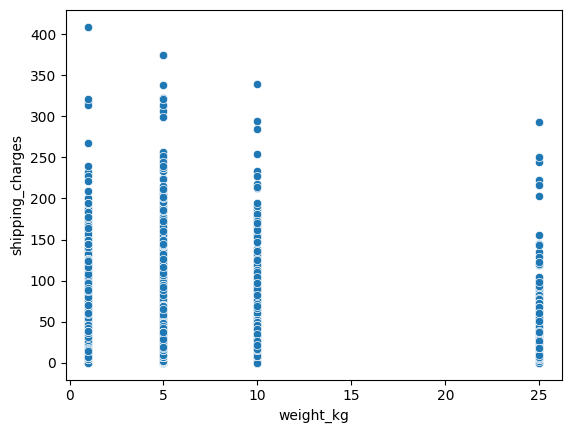

In [21]:
#   무게랑 배송비 비교 배송비가 넘 많은 경우 무게가 많이 들어서 비싼가?? 그럼 합리적인가? 보려고 - 선미
sns.scatterplot(data=marketing_delivered, x='weight_kg', y='shipping_charges')

In [22]:
# 크기, 부피 상위 90% 확인 대, 소형 구분을 위한
print(marketing_delivered['volume_cm3'].quantile([0.8, 0.9]))
print(marketing_delivered['weight_kg'].quantile([0.8, 0.9]))

0.8    172710.19
0.9    212427.42
Name: volume_cm3, dtype: float64
0.8     5.0
0.9    10.0
Name: weight_kg, dtype: float64


In [23]:
#할부가 0인 이상치 확인
zero_p = marketing_delivered[marketing_delivered['payment_installments'] == 0]

# 필요한 컬럼만 선택해서 출력
print(zero_p[['price', 'payment_type', 'payment_installments', 'order_status']])

### 결제방식별 0값 파악

zero_p = marketing_delivered[marketing_delivered['payment_installments'] == 0]
payment_type_counts = zero_p['payment_type'].value_counts()
print(payment_type_counts)

### 0인값 제품 카테고리 파악
zero_products = marketing_delivered[marketing_delivered['payment_installments'] == 0]['category1'].unique()
print(zero_products)

        price payment_type  payment_installments order_status
62759   39.53  credit_card                     0    delivered
100595  70.66  credit_card                     0    delivered
payment_type
credit_card    2
Name: count, dtype: int64
['스포츠용품' '식품']


In [24]:
#할부가 0인 이상치 1로 조정
marketing_delivered.loc[marketing_delivered['payment_installments'] == 0, 'payment_installments'] = 1

In [25]:
# 파생 변수 컬럼 만들기
marketing_delivered['total_price'] = marketing_delivered['price'] + marketing_delivered['shipping_charges']
marketing_delivered['density'] = marketing_delivered['weight_kg'] / (marketing_delivered['volume_cm3'] / 1000000)
marketing_delivered['delivery_total_days'] = (marketing_delivered['order_delivered_timestamp'] - marketing_delivered['order_purchase_timestamp']).dt.days
marketing_delivered['delay_rate'] = marketing_delivered['delivery_delay_days'] / marketing_delivered['delivery_total_days']

# inf나 NaN 처리
marketing_delivered['delay_rate'].replace([np.inf, -np.inf], np.nan, inplace=True)
marketing_delivered['delay_rate'].fillna(0, inplace=True)

marketing_delivered['is_big_product'] = (
    (marketing_delivered['volume_cm3'] > 212427) |
    (marketing_delivered['weight_kg'] > 10)
).astype(int) # 1이면 대형 물품, 0이면 소형

/var/folders/dh/v6wj1h7d7bg8nxdblyppcb5w0000gn/T/ipykernel_28510/1703141147.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  marketing_delivered['delay_rate'].replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/dh/v6wj1h7d7bg8nxdblyppcb5w0000gn/T/ipykernel_28510/1703141147.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object o

In [26]:
# Label encoding 변수 category
# category 타입을 item_cat으로 묶어 사용
marketing_delivered['item_cat'] = marketing_delivered['category1'] + '_' + marketing_delivered['category2']
# 카테고리
le = LabelEncoder()
marketing_delivered['item_cat_encoded'] = le.fit_transform(marketing_delivered['item_cat'])
# 카테고리 맵핑
category1_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(category1_mapping)

{'가구_1인가구': np.int64(0), '가구_거실장/테이블': np.int64(1), '가구_쇼파': np.int64(2), '가구_수납장/선반': np.int64(3), '가구_야외가구': np.int64(4), '가구_옷장/행거': np.int64(5), '가구_책상/책장': np.int64(6), '가구_침대': np.int64(7), '가구_화장대': np.int64(8), '스포츠용품_골프': np.int64(9), '스포츠용품_낚시': np.int64(10), '스포츠용품_등산': np.int64(11), '스포츠용품_캠핑': np.int64(12), '식품_가공식품': np.int64(13), '식품_건강식품': np.int64(14), '식품_신선식품': np.int64(15), '의류_남성의류': np.int64(16), '의류_스포츠의류': np.int64(17), '의류_여성의류': np.int64(18), '의류_유아의류': np.int64(19), '의류_파티의류': np.int64(20), '전자제품_건강가전': np.int64(21), '전자제품_냉장고': np.int64(22), '전자제품_비데': np.int64(23), '전자제품_세탁기/건조기': np.int64(24), '전자제품_음향가전': np.int64(25), '전자제품_주방가전': np.int64(26), '전자제품_청소기': np.int64(27), '화장품_남성화장품': np.int64(28), '화장품_네일케어': np.int64(29), '화장품_마스크/팩': np.int64(30), '화장품_메이크업': np.int64(31), '화장품_바디케어': np.int64(32), '화장품_선케어': np.int64(33), '화장품_스킨케어': np.int64(34), '화장품_향수': np.int64(35), '화장품_헤어케어': np.int64(36)}


In [27]:
# 마케팅 y = 1 n = 0으로 변환
marketing_delivered['marketing_info_agree'] = marketing_delivered['marketing_info_agree'].map({'y': 1, 'n': 0})

In [28]:
# 왜도 완화 및 정규화/표준화
# log로 변환할 컬럼 목록
logs_cols = [
    'shipping_charges',
    'total_price',
    'approval_delay_minutes',
    'density',
    'delivery_total_days'
]
# log에서 std로 변환할 컬럼 목록
stdlog_cols = [
    'shipping_charges', # 로그 변환했어도 여전히 수치 차이 존재. 다른 변수와 영향력 맞추기 위해 표준화 필요
    'total_price', # 구매 금액은 수천~수십만 원까지 매우 큼. 정규화 없이 쓰면 거리 계산 시 이 값 하나가 군집을 결정해버림
    'approval_delay_minutes', # 분 단위 수천까지 존재 → 평균 0, 분산 1로 맞추지 않으면 전체 거리 구조 왜곡
    'density', # 단위가 복잡하고 수치 폭 넓음. 다른 변수들과 거리 계산 시 과대반영 방지
    'delivery_total_days' # delivery_delay_days와 비슷한 값임으로 음수 양수를 포함하고 있음.
]
# std로 변환할 컬럼 목록
std_cols = [
    'payment_installments', # 대부분 1, 일부 12개월 등 극단 값 존재. 표준화 없이 쓰면 비정상적으로 그룹 나뉠 수 있음
    'delivery_delay_days', # 음수~양수 포함. 중심을 0으로 두고 표준편차 맞추면 분포가 잘 반영됨
    'delay_rate',
    'item_cat_encoded',
    'marketing_info_agree',
    'is_big_product',
    'review_score',
    'age'
]

In [29]:
for col in logs_cols:
    marketing_delivered['log_' + col] = marketing_delivered[col].apply(
        lambda x: np.log1p(x) if x > -1 else 0  # 0 값으로 대체
)

scaler = StandardScaler()
for col in stdlog_cols:
    marketing_delivered['std_' + col] = scaler.fit_transform(marketing_delivered[['log_' + col]])
for col in std_cols:
    marketing_delivered['std_' + col] = scaler.fit_transform(marketing_delivered[[col]])

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

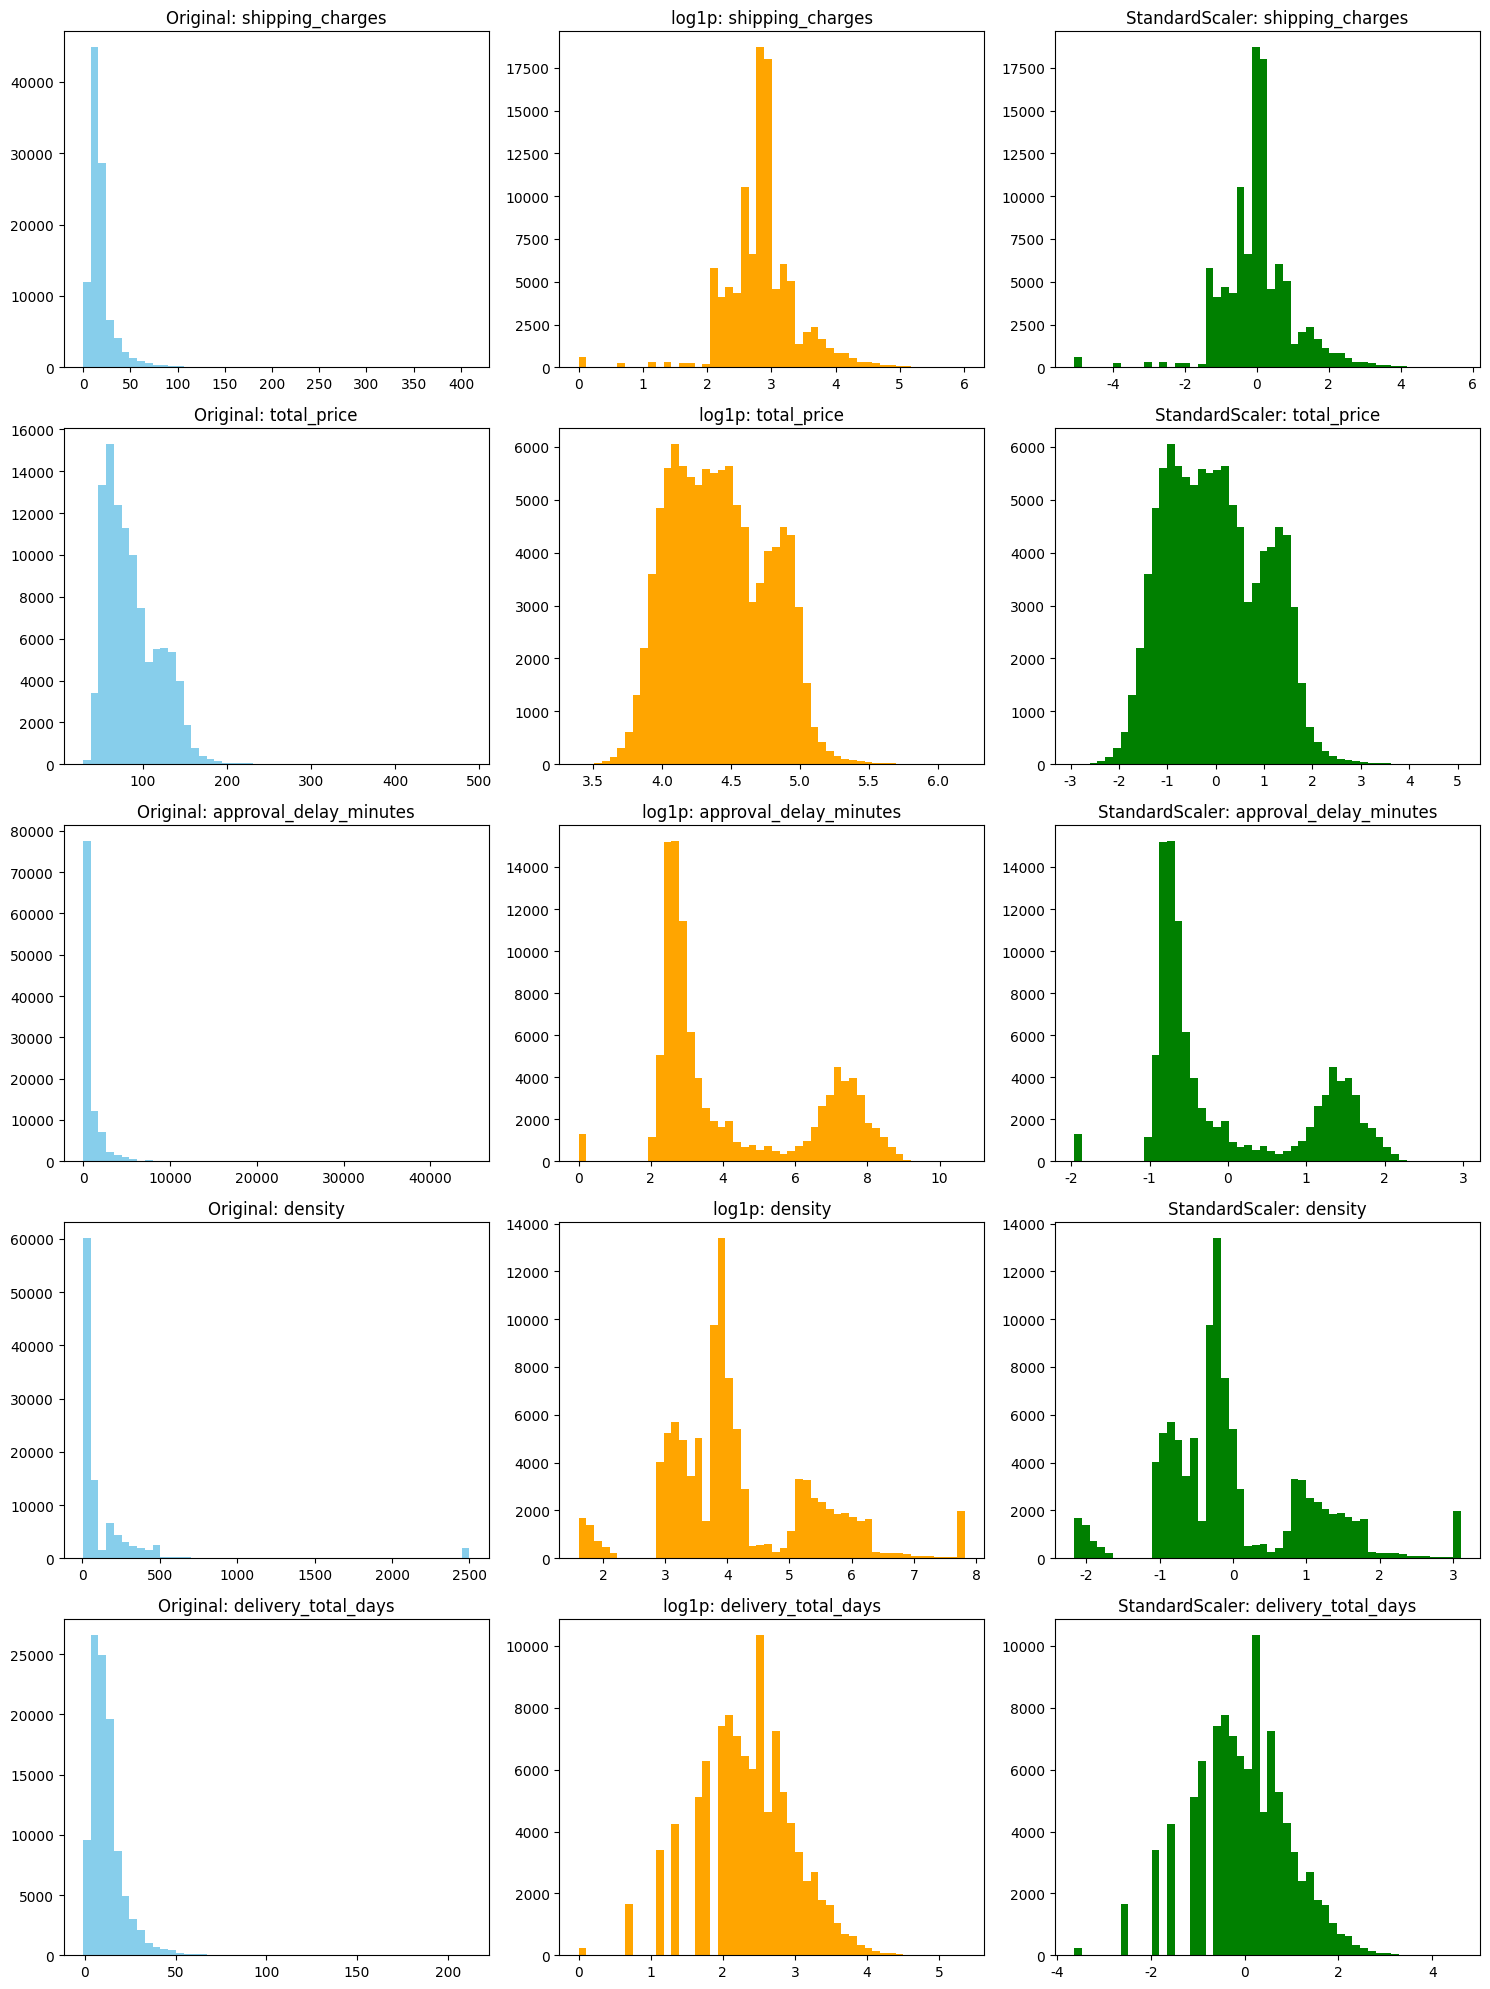

In [30]:
# 차트로 시각화 (로그 전/후, 표준화 전/후 비교)
# 표준화는 거리 기반 계산을 위한 스케일 통일 목적
fig, axes = plt.subplots(len(logs_cols), 3, figsize=(15, 4 * len(logs_cols)))

for i, col in enumerate(logs_cols):
    # 원본
    axes[i, 0].hist(marketing_delivered[col].dropna(), bins=50, color='skyblue')
    axes[i, 0].set_title(f"Original: {col}")

    # 로그 변환
    axes[i, 1].hist(marketing_delivered['log_' + col].dropna(), bins=50, color='orange')
    axes[i, 1].set_title(f"log1p: {col}")

    # 표준화
    if col in stdlog_cols:
        axes[i, 2].hist(marketing_delivered['std_' + col].dropna(), bins=50, color='green')
        axes[i, 2].set_title(f"StandardScaler: {col}")
    else:
        axes[i, 2].axis('off')

plt.tight_layout()
plt.show()

In [31]:
marketing_delivered.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_timestamp', 'order_estimated_delivery_date', 'age', 'gender', 'country', 'payment_type', 'payment_installments', 'seller_id', 'shipping_charges', 'category1', 'category2', 'price', 'delivery_delay_days', 'approval_delay_minutes', 'weight_kg', 'volume_cm3', 'review_score', 'marketing_info_agree', 'agegroup', 'product_id', 'total_price', 'density', 'delivery_total_days', 'delay_rate', 'is_big_product', 'item_cat', 'item_cat_encoded', 'log_shipping_charges', 'log_total_price', 'log_approval_delay_minutes', 'log_density', 'log_delivery_total_days', 'std_shipping_charges', 'std_total_price', 'std_approval_delay_minutes', 'std_density', 'std_delivery_total_days', 'std_payment_installments', 'std_delivery_delay_days', 'std_delay_rate', 'std_item_cat_encoded', 'std_marketing_info_agree', 'std_is_big_product', 'std_review_score', 'std_age'], dtype='object')

In [32]:
# 목적별 클러스터링용 데이터프레임 생성
# 1_소비 성향 기반 행동 클러스터_미주 (목표: "서로 다른 구매 성향/패턴을 가진 고객들을 그룹화") / 고가/저가 구매자, 리뷰 불만족 고객 등 분류 가능
df_behavior = marketing_delivered[[
    'std_total_price',
    'std_shipping_charges',
    'std_payment_installments',
    'std_marketing_info_agree',
    'std_age',
    'std_review_score'
]]

# 2_배송 민감도 기반 경험 클러스터_인재 (목표: "배송 지연·체감 품질에 따른 고객 분류") / 배송 민감군 , 여유로운 고객 , 저평가 리뷰 유저 등 분류 가능
df_experience = marketing_delivered[[
    'std_delivery_delay_days',
    'std_delivery_total_days',
    'std_approval_delay_minutes',
    'std_delay_rate',
    'std_review_score'
]]

# 3_제품 특성 기반 클러스터_선미 (목표: "구매 제품 유형에 따라 고객을 나눔") / 고가·대형 상품 구매자 , 소형·저가 구매자 등 분류 가능
df_product = marketing_delivered[[
    'std_density',
    'std_total_price',
    'std_is_big_product',
    'std_item_cat_encoded',
    'std_review_score'
]]

# 4_혼합 클러스터_상규 (고객 행동 + 배송 경험 + 제품 특성 통합 군집화) / 마케팅 타겟팅, CS 우선 대응, 리텐션 전략에 활용 가능
df_mixed = marketing_delivered[[
    'std_total_price',
    'std_approval_delay_minutes',
    'std_delivery_delay_days',
    'std_delay_rate',
    'std_is_big_product',
    'std_item_cat_encoded',
    'std_density',
    'std_payment_installments',
    'std_marketing_info_agree',
    'std_age',
    'std_review_score'
]]

In [33]:
# 히트맵을 위한 필요한 컬럼만 추출
selected_cols = [
    'std_total_price',
    'std_approval_delay_minutes',
    'std_delivery_delay_days',
    'std_delay_rate',
    'std_is_big_product',
    'std_item_cat_encoded',
    'std_density',
    'std_payment_installments',
    'std_marketing_info_agree',
    'std_age',
    'std_review_score'
]

df_selected = marketing_delivered.copy()

In [34]:
# 문자열 타입 컬럼 제거하고 상관계수 계산
numeric_df = df_selected.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

# 0.5 초과이고 1.0 미만인 조합 추출
high_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if 0.5 <= abs(corr_val) < 0.99:
            high_corr.append((
                corr_matrix.columns[i],
                corr_matrix.columns[j],
                corr_val
            ))

# 결과 출력
high_corr_df = pd.DataFrame(high_corr, columns=['Feature 1', 'Feature 2', 'Correlation'])
display(high_corr_df.sort_values(by='Correlation', ascending=False))

,Feature 1,Feature 2,Correlation
19,total_price,std_total_price,0.977047
18,total_price,log_total_price,0.977047
6,price,std_total_price,0.890890
5,price,log_total_price,0.890890
3,price,total_price,0.877426
23,delivery_total_days,log_delivery_total_days,0.866673
24,delivery_total_days,std_delivery_total_days,0.866673
0,shipping_charges,log_shipping_charges,0.821307
1,shipping_charges,std_shipping_charges,0.821307
10,approval_delay_minutes,std_approval_delay_minutes,0.789082


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

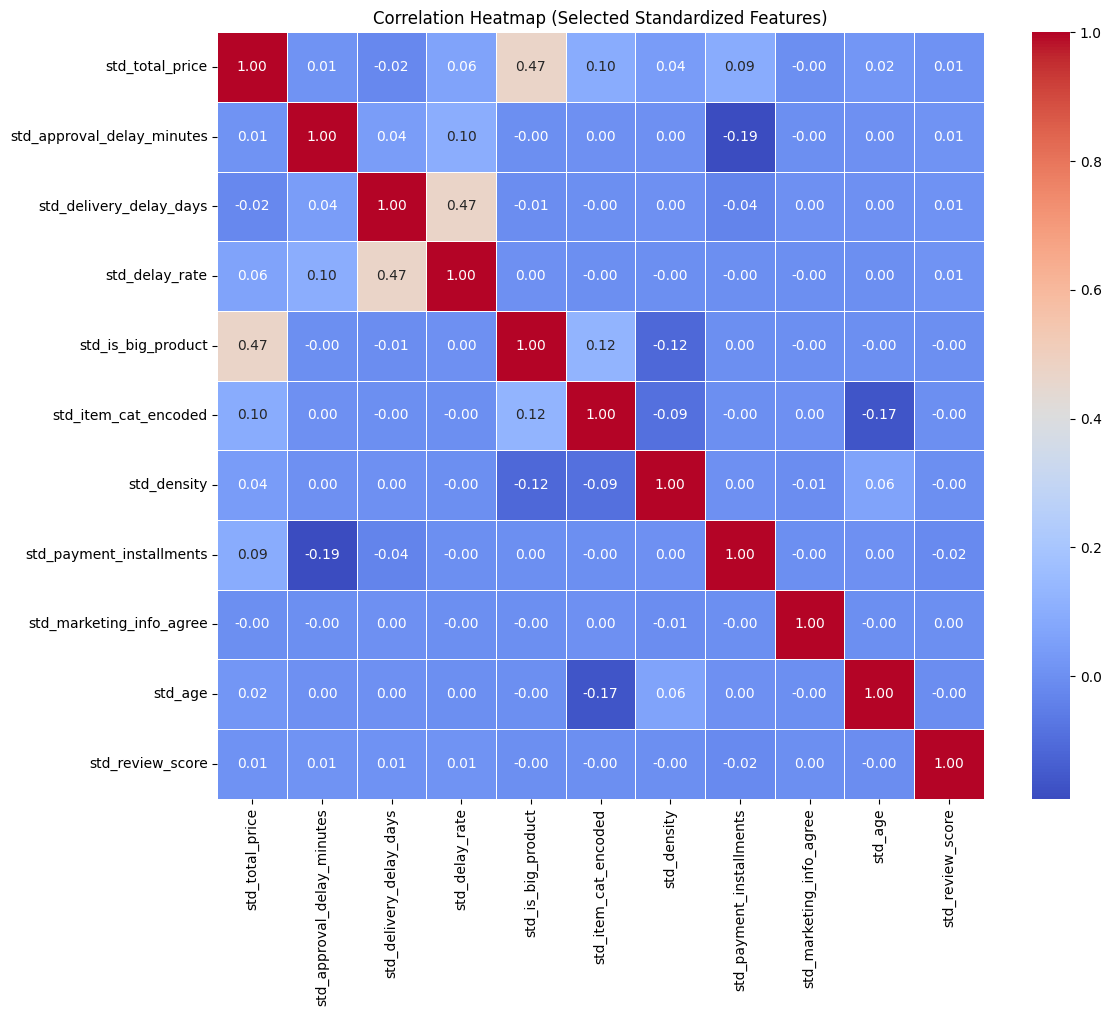

In [35]:
# 선택한 컬럼만 추출
df_corr = df_selected[selected_cols]

# 상관관계 히트맵
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap (Selected Standardized Features)")
plt.tight_layout()
plt.show()

# 1 소비 성향 기반 행동 클러스터

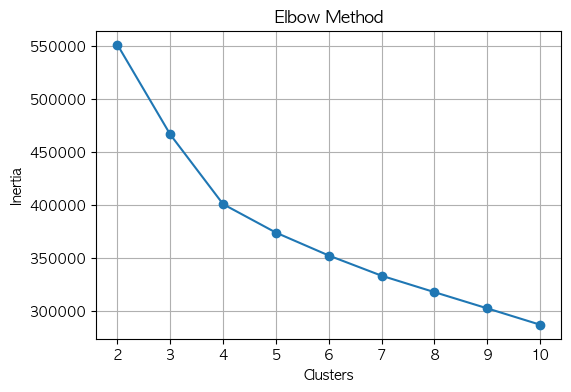

In [182]:
# 클러스터 수 후보
cluster_range = range(2, 11)
inertia_list = []

# inertia (within-cluster sum of squares) 계산
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_behavior)
    inertia_list.append(kmeans.inertia_)

# Elbow Plot 시각화
plt.figure(figsize=(6, 4))
plt.plot(cluster_range, inertia_list, marker='o')
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

/var/folders/nt/92hmc1p9193g7_fqnj1cwwjm0000gn/T/ipykernel_22854/458400957.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_behavior['cluster'] = labels


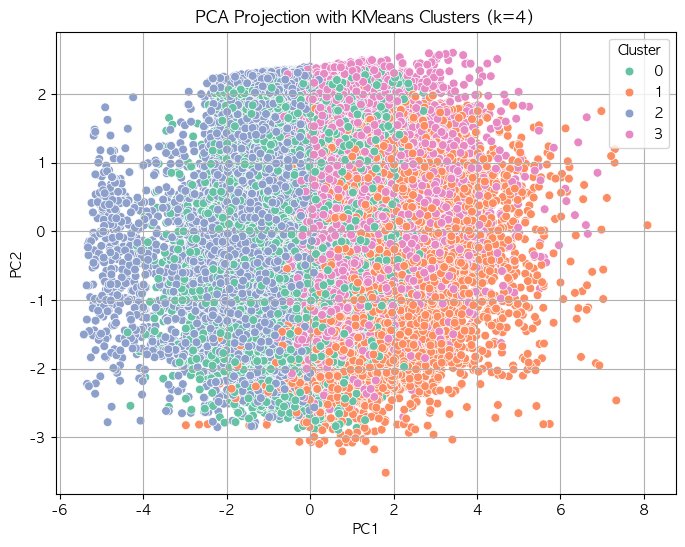

In [185]:
features = ['std_total_price', 'std_shipping_charges', 'std_payment_installments', 'std_review_score', 'std_marketing_info_agree', 'std_age']
X = df_behavior[features].copy()
X_pca = PCA(n_components=2).fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)
df_behavior['cluster'] = labels

# 시각화
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette='Set2', s=40)
plt.title('PCA Projection with KMeans Clusters (k=4)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

In [184]:
# 클러스터별 평균값 확인
cluster_means = df_behavior.groupby('cluster')[features].mean()
print(cluster_means)

         std_total_price  std_shipping_charges  std_payment_installments  std_review_score  std_marketing_info_agree   std_age
cluster                                                                                                                       
0              -0.770625             -0.458960                 -0.343114         -0.030380                  0.687332 -0.088161
1               0.879267              0.387843                 -0.333624          0.053146                  0.664562  0.110470
2               0.288879              0.552837                  2.061830         -0.043504                  0.048701  0.002756
3              -0.073521             -0.106350                 -0.317147          0.007143                 -1.439497 -0.002571


클러스터 0 : 저가고객 + 할부 적음 + 평점 높 + 마케팅 동의 낮 + 연령대 낮 -> 실속형

클러스터 1 : 고가고객(배송비⬆️) + 할부 많음 + 평점 낮+ 마케팅 동의 중간 + 연령대 중 -> 고가 할부적극

클러스터 2 : 초저가고객((배송비⬇️) + 할부 적음 + 평점 낮+ 마케팅 동의 높 + 연령대 낮 -> 비용은 미활발, 젊은 층

클러스터 3 : 초고가고객 + 할부 적음 + 평점 높+ 마케팅 동의 높 + 연령대 높 -> 적극, 연령대 높음

In [186]:
def plot_cluster_bar_ratio(df, column, cluster_col='cluster', order=None):

    count_df = df.groupby([cluster_col, column]).size().reset_index(name='count')
    count_df['percentage'] = count_df['count'] / count_df.groupby(cluster_col)['count'].transform('sum') * 100

    # 시각화
    plt.figure(figsize=(10, 6))
    sns.barplot(data=count_df, x=column, y='percentage', hue=cluster_col, order=order, palette='Set2')
    plt.title(f'클러스터별 {column} 분포 (비율 %)')
    plt.xlabel(column)
    plt.ylabel('비율 (%)')
    plt.legend(title='클러스터')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

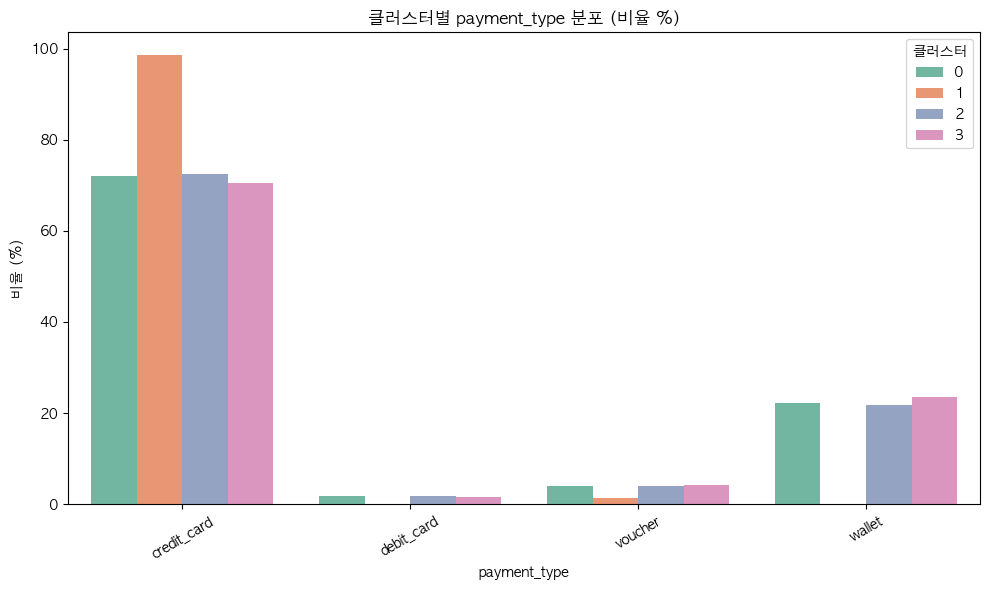

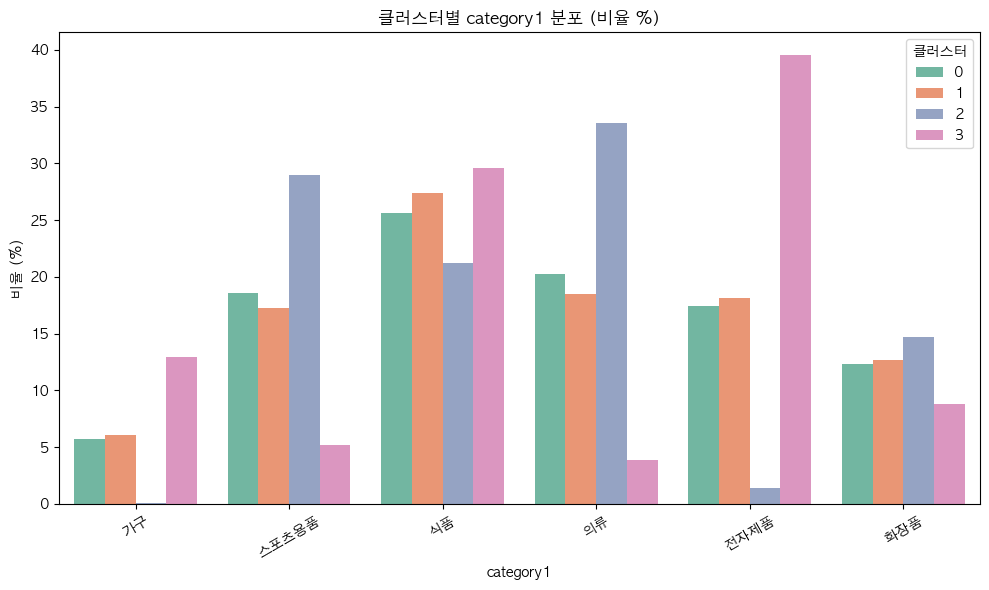

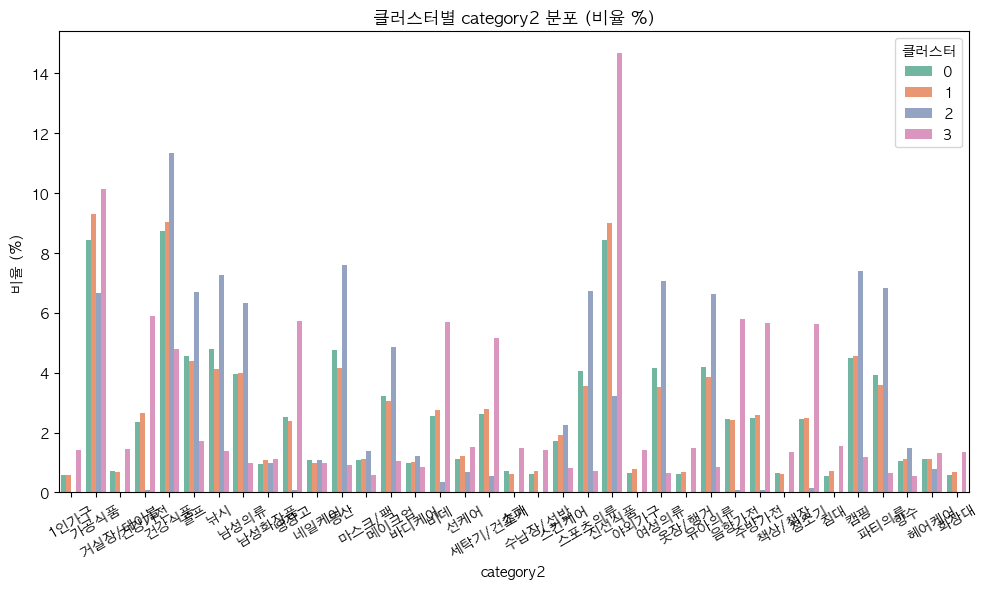

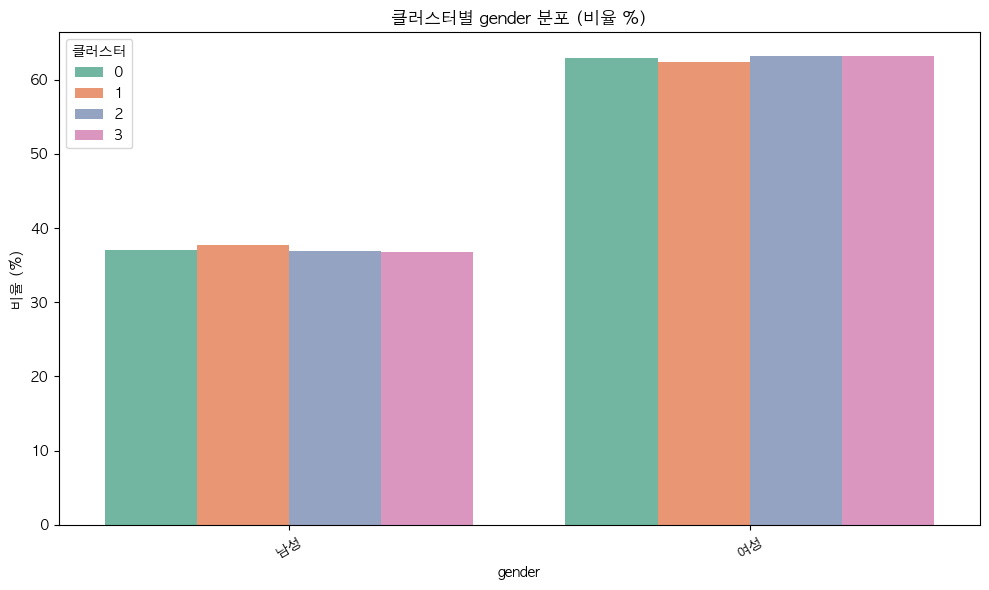

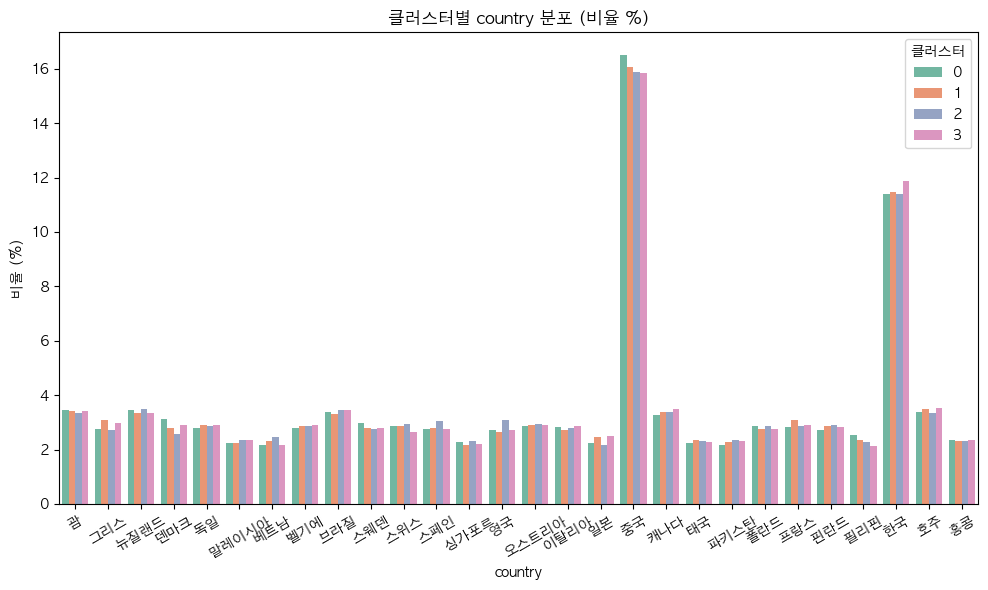

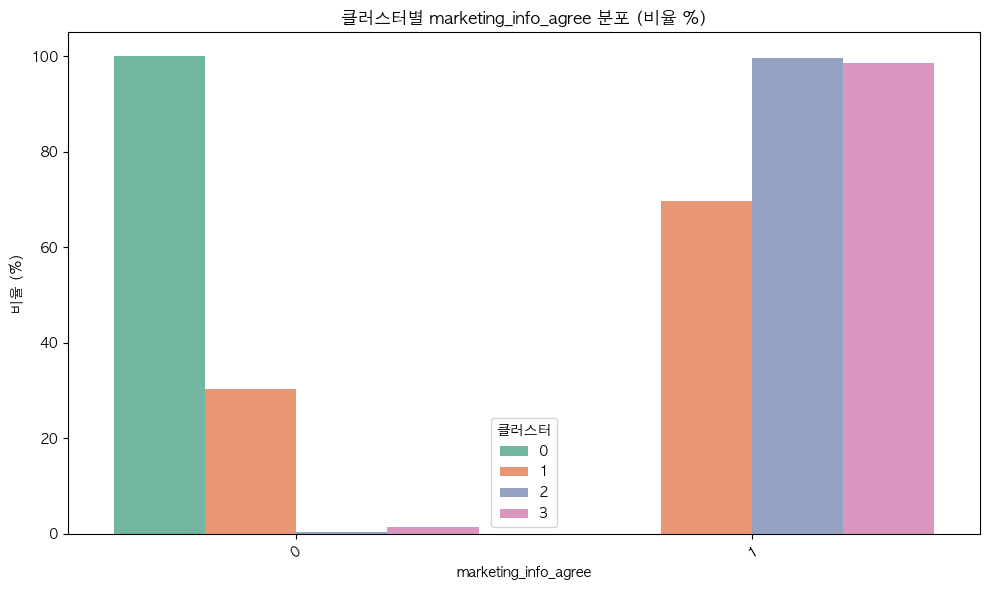

/var/folders/nt/92hmc1p9193g7_fqnj1cwwjm0000gn/T/ipykernel_22854/3624826930.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_df = df.groupby([cluster_col, column]).size().reset_index(name='count')


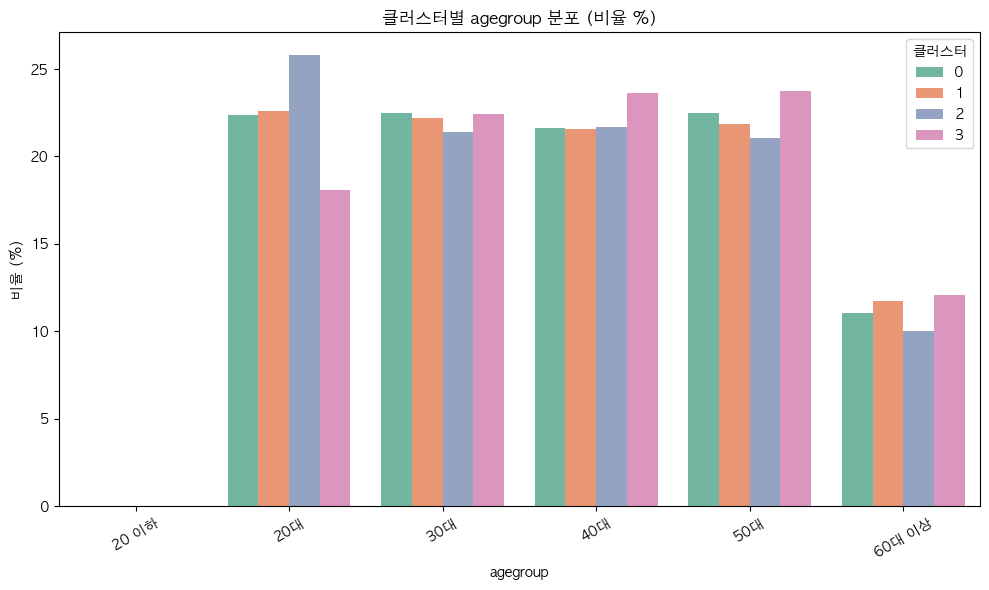

In [187]:
# 변수별 시각화
plot_cluster_bar_ratio(marketing_delivered, 'payment_type')
plot_cluster_bar_ratio(marketing_delivered, 'category1')
plot_cluster_bar_ratio(marketing_delivered, 'category2')
plot_cluster_bar_ratio(marketing_delivered, 'gender')
plot_cluster_bar_ratio(marketing_delivered, 'country')
plot_cluster_bar_ratio(marketing_delivered, 'marketing_info_agree')
plot_cluster_bar_ratio(marketing_delivered, 'agegroup')

결제 유형 : 군집에 상관없이 신용카드가 가장 많고,두번째는 wallet, 1군집은 신용카드가 대다수

카테고리1 : 3군집 전자제품, 2군집 스포츠용품 & 의류, 0,1 군집은 쇼핑성향 비슷

성별 : 여성이 더많음 60% 이상

나라 : 중국 한국이 대다수, 중국은 0군집, 한국은 3군집이 가장 많음

-> 클러스터 0과 1 군집의 소비 카테고리 성향 비슷

In [188]:
marketing_delivered['cluster'] = df_behavior['cluster'].values
# LTV란?
# LTV (Customer Lifetime Value, 고객 생애 가치) : 한 고객이 우리와 거래하면서 예상되는 총 수익
ltv_df = marketing_delivered.groupby('cluster').agg(
    total_ltv=('total_price', 'sum'),  # 총 구매 금액
    avg_ltv=('total_price', 'mean'),   # 구매 1건당 평균 금액
    purchase_count=('order_id', 'count'),  # 총 구매건수
    unique_customers=('customer_id', 'nunique')  # 고객 수
).reset_index()

# 고객당 평균 LTV 및 재구매율
ltv_df['ltv_per_customer'] = ltv_df['total_ltv'] / ltv_df['unique_customers']
ltv_df['repurchase_rate'] = ltv_df['purchase_count'] / ltv_df['unique_customers']

ltv_df

,cluster,total_ltv,avg_ltv,purchase_count,unique_customers,ltv_per_customer,repurchase_rate
0,0,2424141.87,84.745390,28605,26254,92.334192,1.089548
1,1,1377202.80,96.808857,14226,12913,106.652428,1.101680
2,2,2108604.05,63.748346,33077,30584,68.944679,1.081513
3,3,3072491.18,115.040107,26708,25454,120.707597,1.049265


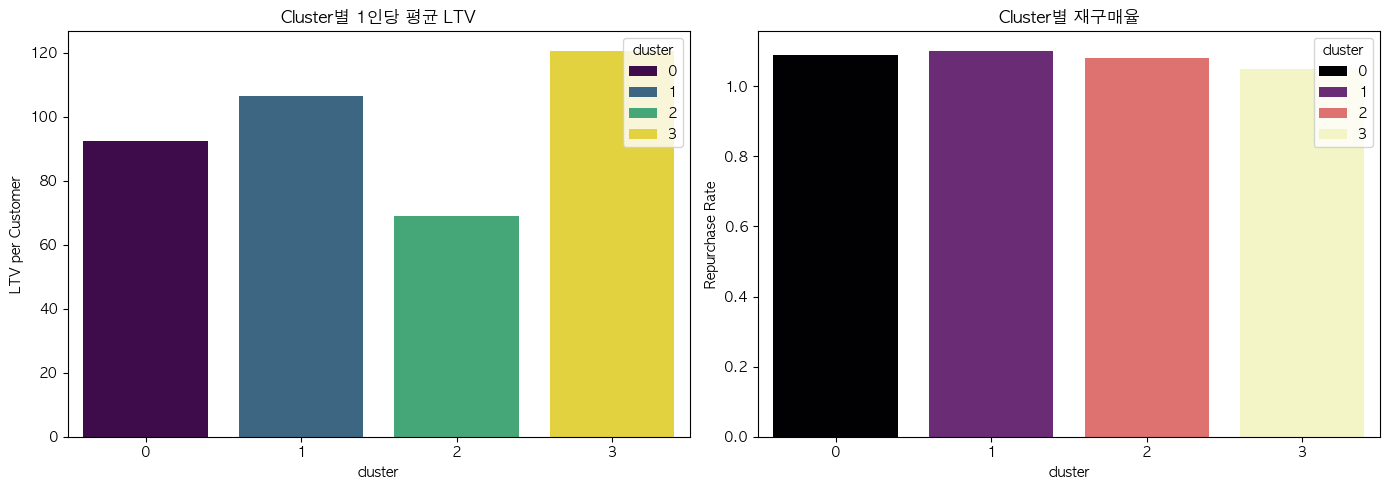

In [189]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# LTV per customer 시각화
sns.barplot(data=ltv_df, x='cluster', y='ltv_per_customer', hue='cluster', ax=axes[0], palette='viridis')
axes[0].set_title('Cluster별 1인당 평균 LTV')
axes[0].set_ylabel('LTV per Customer')
axes[0].set_xlabel('cluster')

# 재구매율 시각화
sns.barplot(data=ltv_df, x='cluster', y='repurchase_rate', hue='cluster', ax=axes[1], palette='magma')
axes[1].set_title('Cluster별 재구매율')
axes[1].set_ylabel('Repurchase Rate')
axes[1].set_xlabel('cluster')

plt.tight_layout()
plt.show()

*Cluster 0: 평균 수준

무난한 소비자층으로, 이탈 방지를 위한 맞춤형 추천이나 장바구니 알림 마케팅이 적절

*Cluster 1: 두번째로 LTV가 높음

비교적 높은 지출을 하는 집단으로, 충성 고객으로 성장할 가능성이 있는 군. 리마인드 마케팅이나 신제품 소개, 적립금 유도 등이 유효

*Cluster 2: LTV가 가장 낮음

저가형 소비자 가능성. 가격 민감형 프로모션이나 무료 배송, 첫 구매 혜택 등의 진입 장벽을 낮추는 전략 필요

*Cluster 3: 1인당 평균 LTV가 가장 높음(고객 한 명이 가장 많은 금액 소비)

가치 높은 VIP 고객으로 볼 수 있으며, 프리미엄 전략이나 멤버십 혜택 강화, 전용 할인 쿠폰 등의 전략 효과적

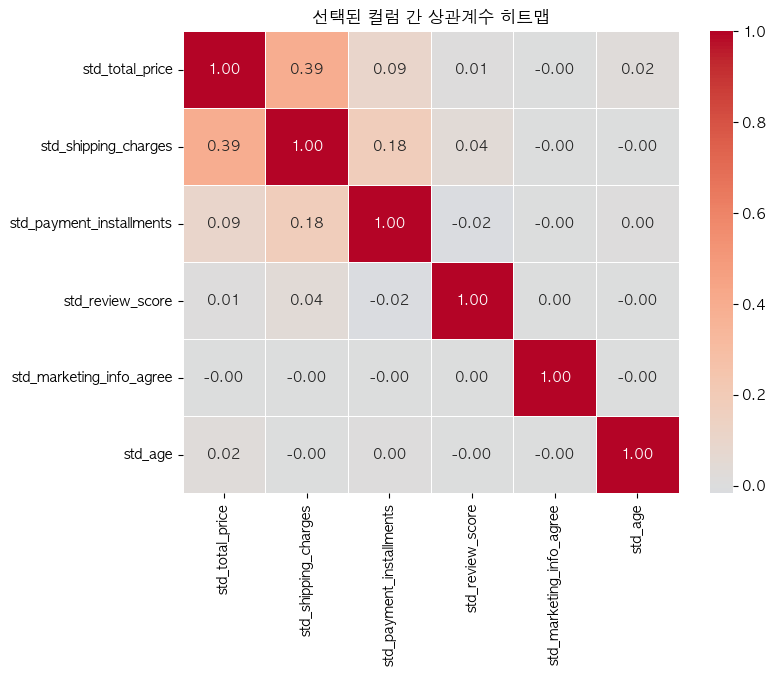

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt

# 선택된 features만으로 상관계수 계산
corr_matrix = df_behavior[features].corr()

# 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5)
plt.title("선택된 컬럼 간 상관계수 히트맵")
plt.show()

서로 컬럼간 연관성은 없는것으로 보여짐(총비용 = 제품가격 + 배송비라, 0.39정도의 연관성이 있으나 의미없음)

0번 클러스터		

std_marketing_info_agree 매우 낮음 (-1.44), 즉 마케팅 동의율 거의 없음

std_total_price, std_shipping_charges, std_payment_installments 모두 낮음(음수) → 구매 금액, 배송비, 할부 적음

나이대는 평균적 (거의 0)

+++++++++++++++++++++++++++++
직접적인 프로모션보단 비침해적 채널(예: 앱 푸시, SNS 광고) 활용

동의율 낮으니 이메일·문자 마케팅보다는 콘텐츠 마케팅이나 유튜브, SNS 기반 마케팅 추천

구매 유도용 무료 체험, 쿠폰 제공 전략 필요 |
+++++++++++++++++++++++++++++

*1번 클러스터

구매 관련 지표(총 구매액, 배송비, 할부)가 모두 양수로 구매력이 가장 높은 편

다만 std_review_score는 약간 낮음 (-0.04) → 만족도나 후기 점수는 평균 이하

std_marketing_info_agree는 거의 0 (보통 수준)

나이대 역시 보통 수준 

+++++++++++++++++++++++++++++
VIP 고객층으로 보고 전용 혜택, 멤버십 프로그램 운영

후기 작성 유도 이벤트(리워드) 강화해 만족도 및 신뢰도 높이기

신규 제품 추천, 업셀링(고급화) 마케팅 집중 |
+++++++++++++++++++++++++++++

*2번 클러스터

모든 구매 지표가 낮음 (-0.77, -0.46, -0.34), 즉 소비가 적음

std_marketing_info_agree는 상당히 높음 (0.68) → 마케팅 동의율 높음

std_review_score는 평균 이하 (-0.03)

std_age는 약간 낮음 (-0.088), 비교적 젊은층 추정

+++++++++++++++++++++++++++++
저비용/가성비 제품 추천 마케팅 유리

다양한 프로모션, 할인 쿠폰 제공으로 구매 유도

젊은층이니 SNS, 모바일 광고 활용 추천

리뷰 작성 독려 필요
+++++++++++++++++++++++++++++

*3번 클러스터

std_total_price 매우 높음 (0.88) → 고가 구매 고객

배송비 중간 수준 (0.39)

할부는 낮음 (-0.33) → 주로 일시불 구매

리뷰 점수는 다소 높음 (0.05)

마케팅 동의도 높음 (0.66)

나이대는 높음 (0.11) → 중장년층 추정

+++++++++++++++++++++++++++++
프리미엄 고객층 타겟으로 프리미엄 제품 추천 및 한정판 프로모션

만족도 높은 고객이니 VIP 이벤트 및 고급 서비스 제공

고가 제품 관련 전문 콘텐츠 마케팅 추천

재구매 유도 위한 멤버십, 포인트 프로그램 강화


<요약>
0번 : 마케팅 동의 적은 실속형 고객 → 비침해적 콘텐츠 중심 마케팅

1번 : 구매력 높지만 후기 점수 아쉬움, 충성고객층 → VIP 혜택, 후기 유도

2번 : 저비용 선호, 마케팅 동의 높은 젊은층 → 프로모션, 할인, SNS 집중

3번 : 고가 제품 선호, 만족도 높음, 중장년층 → 프리미엄 마케팅, 고급 서비스

# 2 배송 민감도 기반 경험 클러스터

In [ ]:
print(df_experience.isnull().sum())

In [ ]:
# approval_delay_minutes 결측치 중앙값으로 대체
median_approval_delay = marketing_delivered['approval_delay_minutes'].median()
marketing_delivered['approval_delay_minutes'].fillna(median_approval_delay, inplace=True)

# 표준화 다시 수행
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
marketing_delivered['std_approval_delay_minutes'] = scaler.fit_transform(
    marketing_delivered[['approval_delay_minutes']]
)

# 클러스터링용 데이터프레임 생성
df_experience = marketing_delivered[[
    'std_delivery_delay_days', 'std_delivery_total_days',
    'review_score', 'std_delay_rate','std_approval_delay_minutes'
]]

print(df_experience.isnull().sum())

In [ ]:
# Elbow Method 최적의 클러스터 수 찾기
inertia = []
K_range = range(2, 11)

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_experience)
    inertia.append(kmeans.inertia_)

# 시각화 Elbow
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("클러스터 수")
plt.ylabel("Inertia")

plt.tight_layout()
plt.show()

In [ ]:
# 최적 클러스터 수 설정
best_k = 4

kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10, max_iter=300)
df_experience['cluster'] = kmeans.fit_predict(
    df_experience[['std_delivery_delay_days',
                   'std_delivery_total_days',
                   'std_approval_delay_minutes',
                   'std_delay_rate',
                   'std_review_score']]
)

print(df_experience['cluster'].value_counts())

In [ ]:
# 군집별 평균 (정규화된 값으로 해석)
cluster_summary = df_experience.groupby('cluster')[['std_delivery_delay_days',
                                                    'std_delivery_total_days',
                                                    'std_review_score',
                                                    'std_delay_rate',
                                                    'std_approval_delay_minutes']].mean()

print(cluster_summary)

In [ ]:
#버블 차트
plt.figure(figsize=(6,4))

scatter = plt.scatter(cluster_summary['std_approval_delay_minutes'],
                      cluster_summary['std_review_score'],
                      c=cluster_summary.index, s=200, cmap='tab10', label=cluster_summary.index)

for i in cluster_summary.index:
    x = cluster_summary['std_approval_delay_minutes'][i]
    y = cluster_summary['std_review_score'][i]
    plt.text(x + (x * 0.02), y + (y * 0.02),
             f'Cluster {i}', fontsize=10)


plt.title("군집별 평균 (배송지연 vs 리뷰점수)")
plt.xlabel("std_approval_delay_minutes")
plt.ylabel("std_review_score")

handles, labels = scatter.legend_elements(prop="colors")
plt.legend(handles, [f"Cluster {i}" for i in cluster_summary.index], title="Cluster", loc="best")

plt.grid(True)
plt.show()

In [ ]:
# PCA 적용 (2차원으로 축소)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_experience.drop(columns=['cluster'], errors='ignore'))
df_pca = pd.DataFrame(pca_result, columns=['PCA 1', 'PCA 2'])
df_pca['cluster'] = df_experience['cluster']

# 시각화
plt.figure(figsize=(8,6))

for cluster_id in df_pca['cluster'].unique():
    subset = df_pca[df_pca['cluster'] == cluster_id]
    plt.scatter(subset['PCA 1'], subset['PCA 2'], s=20, alpha=0.6, label=f'Cluster {cluster_id}')

plt.title("PCA 시각화: 클러스터 분포")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 후보 변수 + 배송지연 변수 선택
cols_for_corr = [
    "delivery_delay_days", "payment_type", "category1", "category2",
    "gender", "country", "marketing_info_agree", "agegroup"
]

# 범주형 → 수치형 인코딩 (Label Encoding)
from sklearn.preprocessing import LabelEncoder

df_corr = marketing_delivered[cols_for_corr].copy()
le = LabelEncoder()

for col in df_corr.columns:
    if df_corr[col].dtype == "object":
        df_corr[col] = le.fit_transform(df_corr[col].astype(str))

# 상관계수 계산
corr = df_corr.corr()

# 히트맵 시각화
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("배송지연 관련 변수 상관계수 히트맵")
plt.show()

In [ ]:
# 상관계수 계산
corr = df_experience.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("배송 경험 관련 변수 상관계수 히트맵")
plt.show()

In [ ]:
# LTV란?
# LTV (Customer Lifetime Value, 고객 생애 가치) : 한 고객이 우리와 거래하면서 예상되는 총 수익
df_merged = marketing_delivered.copy()
df_merged['cluster'] = df_experience['cluster'].values

ltv_df = df_merged.groupby('cluster').agg(
    total_ltv=('total_price', 'sum'),  # 총 구매 금액
    avg_ltv=('total_price', 'mean'),   # 구매 1건당 평균 금액
    purchase_count=('order_id', 'count'),  # 총 구매건수
    unique_customers=('customer_id', 'nunique')  # 고객 수
).reset_index()

# 고객당 평균 LTV 및 재구매율
ltv_df['ltv_per_customer'] = ltv_df['total_ltv'] / ltv_df['unique_customers']
ltv_df['repurchase_rate'] = ltv_df['purchase_count'] / ltv_df['unique_customers']

ltv_df

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# LTV per customer 시각화
sns.barplot(data=ltv_df, x='cluster', y='ltv_per_customer', hue='cluster', ax=axes[0], palette='viridis')
axes[0].set_title('Cluster별 1인당 평균 LTV')
axes[0].set_ylabel('LTV per Customer')
axes[0].set_xlabel('cluster')

# 재구매율 시각화
sns.barplot(data=ltv_df, x='cluster', y='repurchase_rate', hue='cluster', ax=axes[1], palette='magma')
axes[1].set_title('Cluster별 재구매율')
axes[1].set_ylabel('Repurchase Rate')
axes[1].set_xlabel('cluster')

plt.tight_layout()
plt.show()

0번 : 배송 지연 수용 고객군

배송 지연 많음, 소요일 가장 김, 리뷰 점수 보통, 결제 승인 빠름

마케팅 전략
신제품/예약 판매 타깃
→ 배송이 느린 고가 상품, 예약 상품에 긍정적 반응 가능

프리미엄 멤버십 제안
→ "배송 기간이 길어도 희소성 있는 상품"에 대한 수요를 활용

리뷰 개선 캠페인
→ 보통 수준의 리뷰를 긍정적으로 유도 (포인트/쿠폰 제공)

1번 : 저평가 리뷰 고객군

배송 지연 거의 없음, 소요일 짧음, 리뷰 점수 가장 낮음, 결제 승인 빠름

마케팅 전략
품질 개선 + 사후 케어 집중
→ 배송 문제가 아닌 상품 품질이나 설명과의 불일치가 주요 불만 요소일 가능성

리뷰 피드백 프로그램
→ 불만족 원인을 직접 수집, 개선 후 쿠폰 지급

브랜드 신뢰도 강화 캠페인
→ SNS, 오프라인 후기, 고객 스토리 등을 활용한 긍정적 이미지 구축

2번 : 여유로운 고객군

배송 지연 적음, 소요일 짧음, 리뷰 점수 가장 높음, 결제 승인 빠름

마케팅 전략
VIP/로열티 프로그램 강화
→ 장기 충성 고객으로 유도

고가·프리미엄 상품 크로스셀링
→ 긍정적 경험이 많아 추가 구매 가능성 높음

리뷰 활용 마케팅
→ 긍정 리뷰를 다른 고객에게 노출하여 전환율 상승

3번 : 승인 지연 불만 고객군
배송 지연 보통, 소요일 약간 김, 리뷰 점수 보통, 결제 승인 매우 느림

마케팅 전략
결제 승인 프로세스 개선
→ 간편결제, 승인 속도 향상 시스템 도입

배송 상태 실시간 안내
→ 승인 지연 동안 고객 불안을 줄이는 알림 서비스

보상 쿠폰 지급
→ 승인 지연에 대한 사과 및 재구매 유도

# 3 제품 특성 기반 클러스터

In [52]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False


/var/folders/dh/v6wj1h7d7bg8nxdblyppcb5w0000gn/T/ipykernel_28510/3111212912.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_product['cluster'] = kmeans.fit_predict(X)


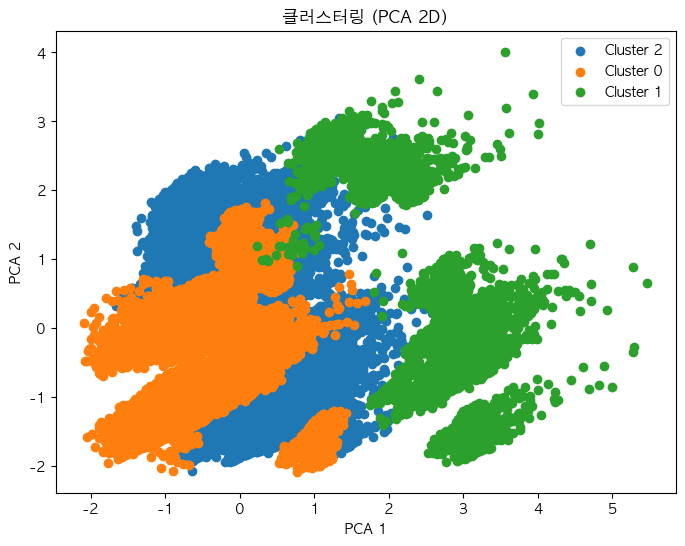

In [53]:
# 5개 변수 선택
X = df_product[[
    'std_density',
    'std_total_price',
    'std_is_big_product',
    'std_item_cat_encoded',
    'std_review_score'
]]

# 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42)
df_product['cluster'] = kmeans.fit_predict(X)

# PCA로 2D 시각화
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))

# 군집별로 반복하면서 점 찍고 범례 추가
for cluster_num in df_product['cluster'].unique():
    mask = df_product['cluster'] == cluster_num
    plt.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        label=f'Cluster {cluster_num}'
    )

plt.title("클러스터링 (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

In [54]:
df_product.groupby('cluster').mean()

,std_density,std_total_price,std_is_big_product,std_item_cat_encoded,std_review_score
cluster,,,,,
0,-0.524491,-0.639429,-0.390309,-0.484267,-0.002298
1,-0.295991,1.215453,2.560330,0.314803,-0.009247
2,0.667170,0.310655,-0.390309,0.428448,0.005459


In [55]:
# LTV란?
# LTV (Customer Lifetime Value, 고객 생애 가치) : 한 고객이 우리와 거래하면서 예상되는 총 수익
df_merged = marketing_delivered.copy()
df_merged['cluster'] = df_product['cluster'].values

ltv_df = df_merged.groupby('cluster').agg(
    total_ltv=('total_price', 'sum'),  # 총 구매 금액
    avg_ltv=('total_price', 'mean'),   # 구매 1건당 평균 금액
    purchase_count=('order_id', 'count'),  # 총 구매건수
    unique_customers=('customer_id', 'nunique')  # 고객 수
).reset_index()

# 고객당 평균 LTV 및 재구매율
ltv_df['ltv_per_customer'] = ltv_df['total_ltv'] / ltv_df['unique_customers']
ltv_df['repurchase_rate'] = ltv_df['purchase_count'] / ltv_df['unique_customers']

ltv_df

,cluster,total_ltv,avg_ltv,purchase_count,unique_customers,ltv_per_customer,repurchase_rate
0,0,3193538.72,68.707804,46480,43608,73.232864,1.065859
1,1,1742272.84,128.353679,13574,13167,132.321170,1.030911
2,2,4046628.34,95.076085,42562,40325,100.350362,1.055474


군집별 해석

군집 0

밀도: 낮음

가격: 낮음

대형물품: 아님

카테고리: 평균 이하

리뷰점수: 평균과 비슷

특징: 소형·저가 상품을 구매하는 고객. → 저렴한 제품 위주의 ‘가성비형’ 고객으로 해석 가능.

군집 1

밀도: 조금 낮음

가격: 매우 높음

대형물품: 매우 큼

카테고리: 평균 이상

리뷰점수: 평균과 비슷

특징: 대형·고가 상품을 주로 구매하는 고객. → 프리미엄 상품을 선호하는 ‘고가형’ 고객.

군집 2

밀도: 높음

가격: 조금 높음

대형물품: 아님

카테고리: 평균 이상

리뷰점수: 평균과 비슷

특징: 중가·고밀도 제품을 선호. → ‘중간 가격대 + 다양한 카테고리’ 고객군.

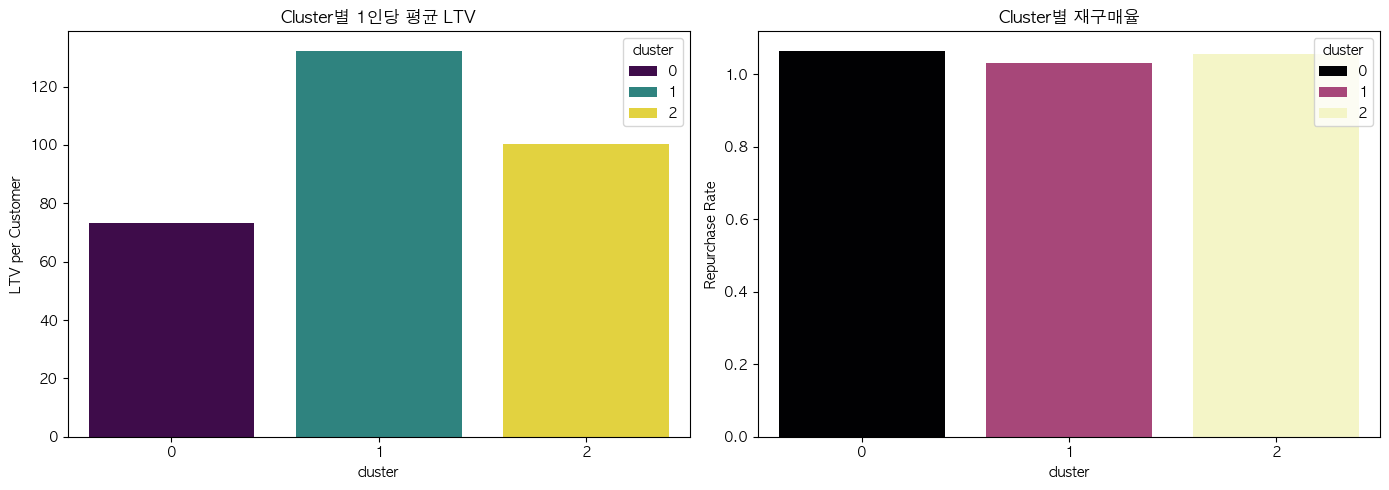

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# LTV per customer 시각화
sns.barplot(data=ltv_df, x='cluster', y='ltv_per_customer', hue='cluster', ax=axes[0], palette='viridis')
axes[0].set_title('Cluster별 1인당 평균 LTV')
axes[0].set_ylabel('LTV per Customer')
axes[0].set_xlabel('cluster')

# 재구매율 시각화
sns.barplot(data=ltv_df, x='cluster', y='repurchase_rate', hue='cluster', ax=axes[1], palette='magma')
axes[1].set_title('Cluster별 재구매율')
axes[1].set_ylabel('Repurchase Rate')
axes[1].set_xlabel('cluster')

plt.tight_layout()
plt.show()

- 0군집 즉 밀도가 낮고 가격이 낮은 가성비제품을 구매하는 구매층들은 가공식품, 건강가전, 골프, 낚시 스포츠의류, 야외가구, 옷장, 캠핑, 파티의류등을 주로 많이 구매했으며
- 1군집 즉 밀도가 낮고 가격이 높은 제품을 구매하는 고객층은 거실장, 냉장고, 비데 세타기, 신선식품, 유아의류, 음향가전, 주방가전, 청소기 등을 많이 구매했다
- 2군집은 밀도가 높고 가격이 낮은 제품을 구매한는 고객층은 눈에 띄게 적은 수치를 보였고 주로 화장품이나 케어제품을 많이 구매하였다
- 1 군집은 가격에 민감하지 않는 프리미엄 구매자로 예상하여 마케팅 타겟팅할 가치가 높을것으로 생각함
- 0 군집은 가성비제품 즉 가격이 합리적이고 실용적인 제품을 선호하는것으로 예상하고 가성비제품을 마케팅하면 타켓팅 가치가 높을것으로 생각함
- 활동적인 사람 즉 외향적인사람이 0군집에 많이 분포되어있다 1군집은 가전제품, 생활용품등을 많이 구매하는 내향적인 사람으로 추측, 2군집은 화장품류를 많이 구매함

중간정도 크기 제품 많이 구매함                     무거운 가전제품 많이 구매                                   가벼운 화장품류 많이 구매

In [57]:
# 1. 연령대별 군집별 카운트 집계
counts = df_product.groupby('agegroup')['cluster'].value_counts().reset_index()
counts.columns = ['agegroup', 'cluster', 'count']

# 2. 연령대별 총합 계산
totals = counts.groupby('agegroup')['count'].transform('sum')

# 3. 비율 계산
counts['ratio'] = counts['count'] / totals * 100

# 4. barplot 그리기
plt.figure(figsize=(10, 4))
sns.barplot(
    x='agegroup',
    y='ratio',
    hue='cluster',
    data=counts
)

plt.ylabel('비율 (%)')
plt.xticks(rotation=45)
plt.show()
# 비율로 확인해본결과 0군집이 주로 4~50퍼센트를 차지하고 10~40대는 1군집이 다음으로 많지만 50대는 식품이나 화장품을 많이 구매하는 2군집이 다음으로 많았다

KeyError: 'agegroup'

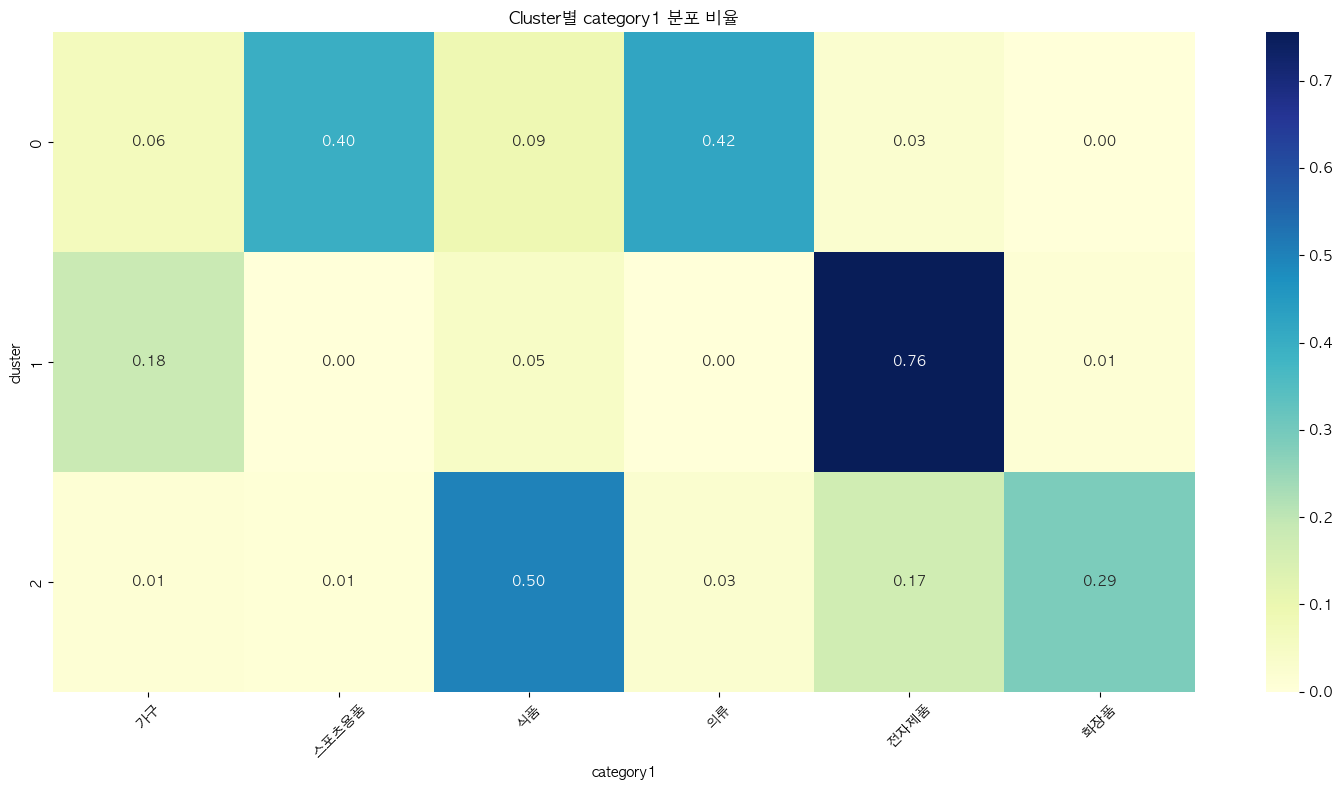

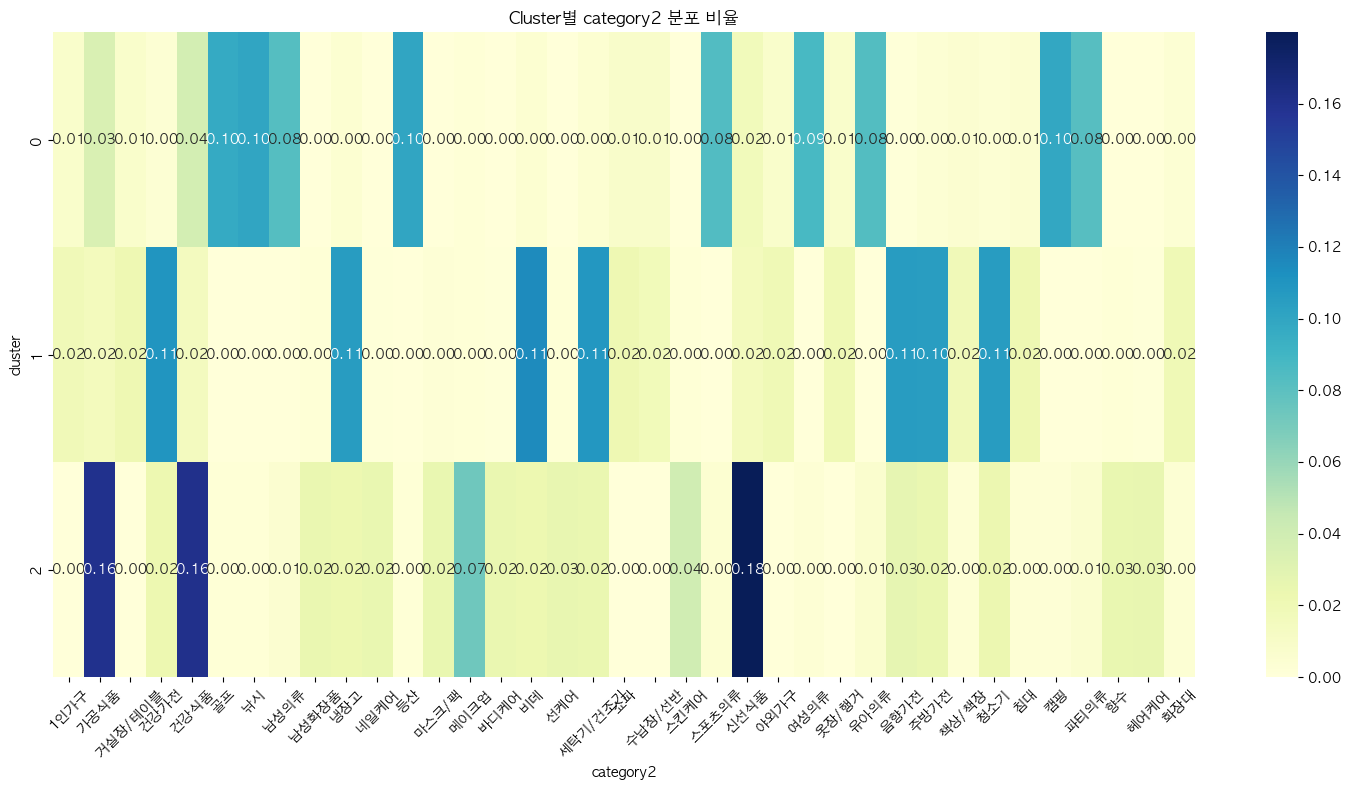

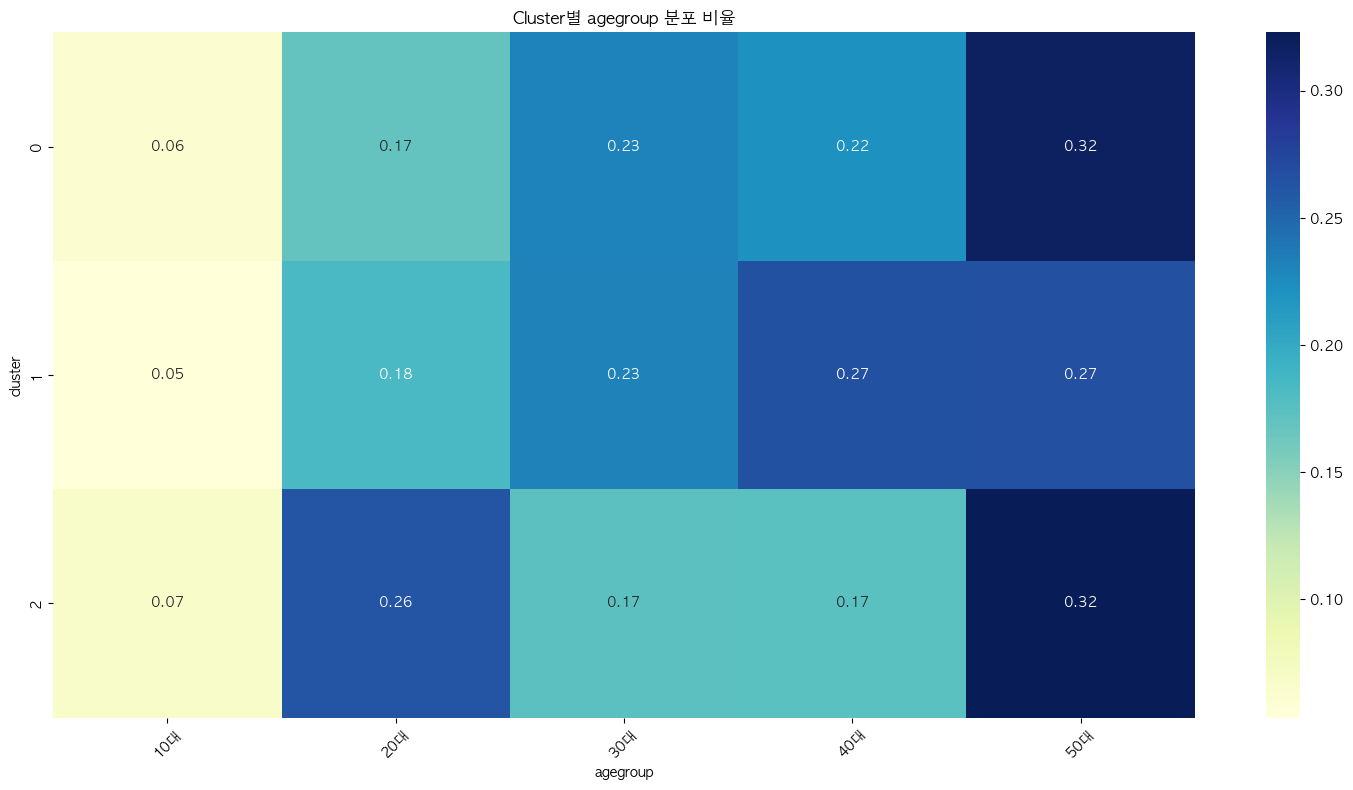

In [58]:
# payment_type category1 category2 gender country review_score marketing_info_agree agegroup
# 클러스터 라벨 붙여진 df_product 기준으로 병합
df_merged = marketing_delivered.copy()
df_merged['cluster'] = df_product['cluster'].values

cols = [
    'category1', 'category2','agegroup'
]

for col in cols:
    ct = pd.crosstab(df_merged['cluster'], df_merged[col], normalize='index')
    plt.figure(figsize=(15, 8))
    sns.heatmap(ct, annot=True, fmt=".2f", cmap='YlGnBu')
    plt.title(f'Cluster별 {col} 분포 비율')
    plt.ylabel('cluster')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# for col in cols:
#     ct = pd.crosstab(df_merged['cluster'], df_merged[col])
#     plt.figure(figsize=(15, 8))
#     sns.heatmap(ct, annot=True, fmt="d", cmap='Oranges')
#     plt.title(f'[절대값] Cluster별 {col} 분포')
#     plt.ylabel('cluster')
#     plt.xlabel(col)
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()

# 4 혼합 클러스터

In [ ]:
df_mixed.isnull().sum()

std_total_price               0
std_approval_delay_minutes    0
std_delivery_delay_days       0
std_delay_rate                0
std_is_big_product            0
std_item_cat_encoded          0
std_density                   0
std_payment_installments      0
std_marketing_info_agree      0
std_age                       0
std_review_score              0
dtype: int64

In [ ]:
df_mixed = df_mixed[[
    'std_total_price',
    'std_approval_delay_minutes',
    'std_delivery_delay_days',
    'std_delay_rate',
    'std_is_big_product',
    'std_item_cat_encoded',
    'std_density',
    'std_payment_installments',
    'std_marketing_info_agree',
    'std_age',
    'std_review_score'
]]

In [ ]:
df_mixed.describe()

,std_total_price,std_approval_delay_minutes,std_delivery_delay_days,std_delay_rate,std_is_big_product,std_item_cat_encoded,std_density,std_payment_installments,std_marketing_info_agree,std_age,std_review_score
count,1.026160e+05,1.026160e+05,1.026160e+05,1.026160e+05,1.026160e+05,1.026160e+05,1.026160e+05,1.026160e+05,1.026160e+05,1.026160e+05,1.026160e+05
mean,-9.495969e-16,2.624305e-17,-3.368666e-17,1.109271e-16,6.730408e-17,2.110523e-16,-4.201658e-16,-2.859731e-17,-2.014968e-17,1.250526e-16,-9.991748e-17
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-2.923603e+00,-1.961619e+00,-1.323265e+01,-2.026885e+01,-3.903093e-01,-2.298557e+00,-2.166835e+00,-7.125245e-01,-1.439497e+00,-1.690827e+00,-2.173315e+00
25%,-8.221641e-01,-7.458171e-01,-4.908350e-01,-2.190238e-01,-3.903093e-01,-5.994538e-01,-6.540606e-01,-7.125245e-01,-1.439497e+00,-8.984274e-01,-1.229871e+00
50%,-7.624232e-02,-5.590211e-01,-9.877907e-02,2.394497e-01,-3.903093e-01,-2.073531e-01,-1.960734e-01,-3.486907e-01,6.946871e-01,-3.399149e-02,-2.864275e-01
75%,8.069541e-01,1.148583e+00,4.893049e-01,5.634251e-01,-3.903093e-01,7.075488e-01,7.961325e-01,3.789771e-01,6.946871e-01,8.304444e-01,6.570163e-01
max,5.063717e+00,2.969194e+00,1.960203e+01,8.145321e+00,2.562070e+00,2.406652e+00,3.107232e+00,7.655654e+00,6.946871e-01,1.694880e+00,1.600460e+00


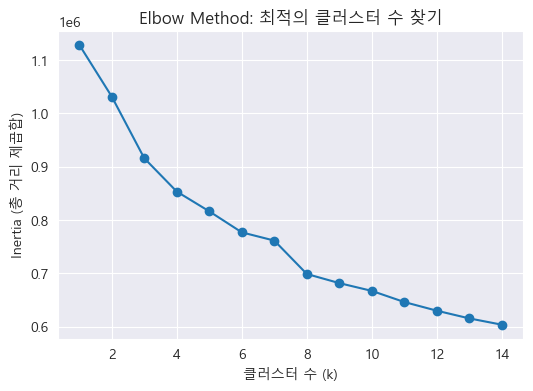

In [ ]:
# Elbow Method: 최적의 클러스터 수 찾기
inertia = []
K_range = range(1, 15)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_mixed)
    inertia.append(kmeans.inertia_)

# Elbow 시각화
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method: 최적의 클러스터 수 찾기")
plt.xlabel("클러스터 수 (k)")
plt.ylabel("Inertia (총 거리 제곱합)")
plt.grid(True)
plt.show()

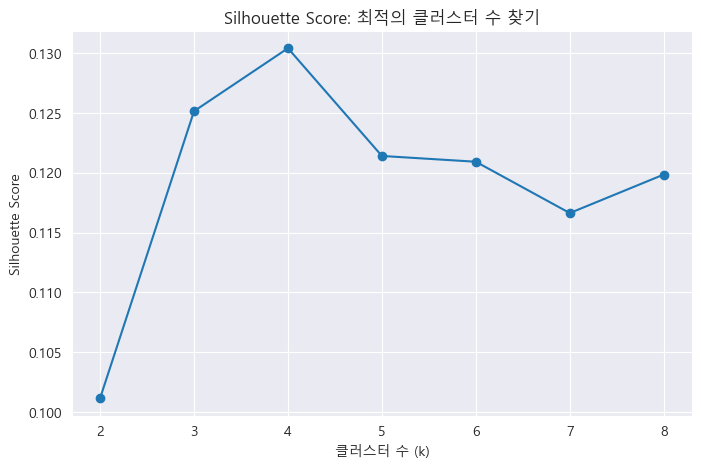

In [ ]:
# Silhouette Score 계산 및 시각화
scores = []
k_range = range(2, 9)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(df_mixed)
    score = silhouette_score(df_mixed, labels)
    scores.append(score)

# 시각화
plt.figure(figsize=(8, 5))
plt.plot(k_range, scores, marker='o')
plt.title("Silhouette Score: 최적의 클러스터 수 찾기")
plt.xlabel("클러스터 수 (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.xticks(k_range)
plt.show()

In [ ]:
# 고객 세그멘테이션 (KMeans 클러스터링)
kmeans = KMeans(n_clusters=4, random_state=42)
df_mixed.loc[:, 'Cluster'] = kmeans.fit_predict(df_mixed)

In [ ]:
# 군집별 샘플 수
df_mixed['Cluster'].value_counts().sort_index()

Cluster
0    25757
1    41592
2    21701
3    13566
Name: count, dtype: int64

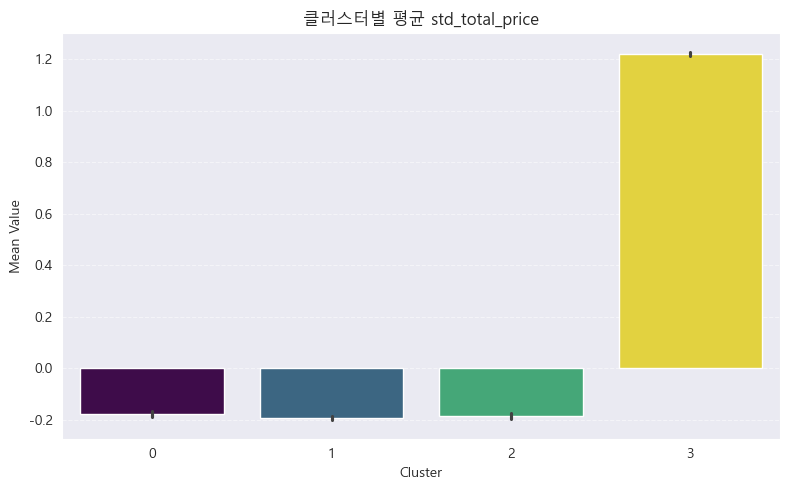

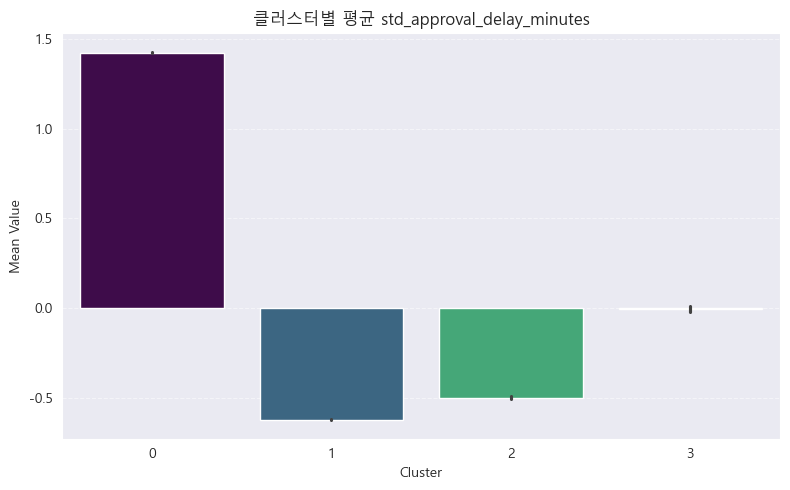

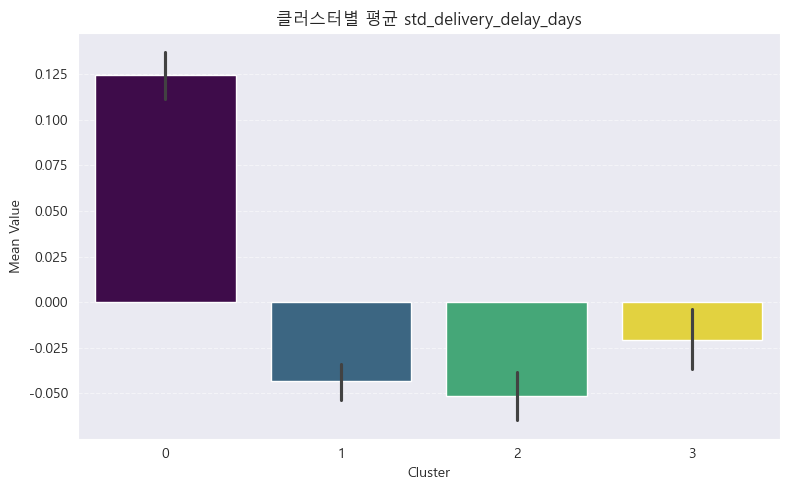

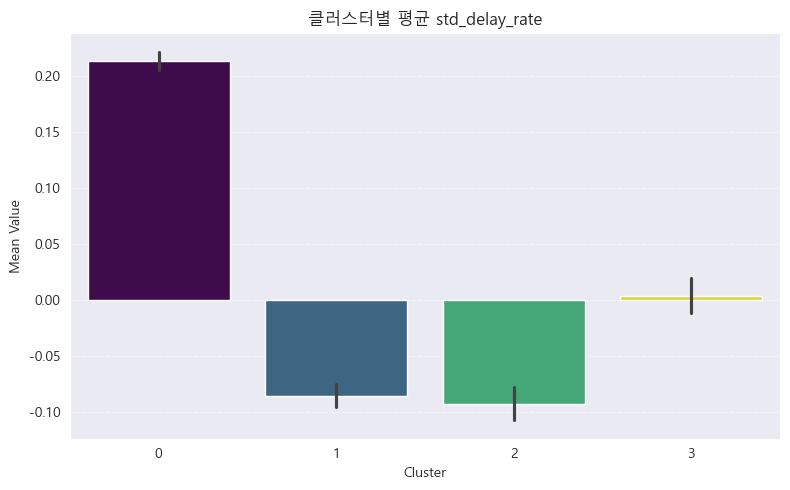

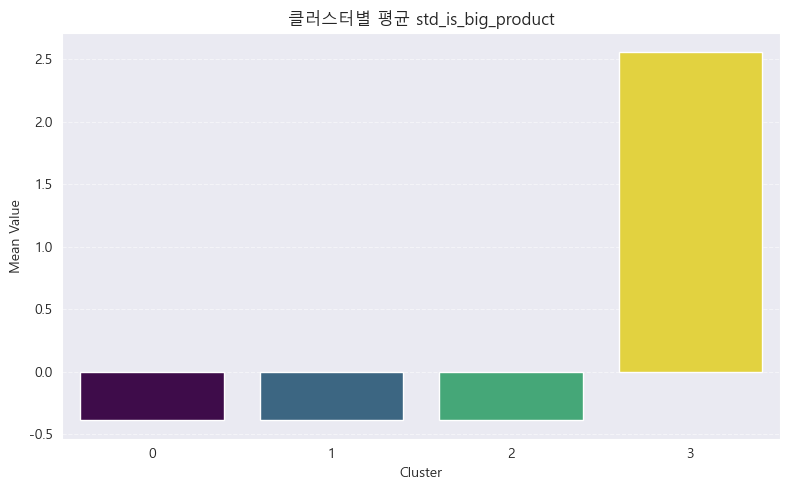

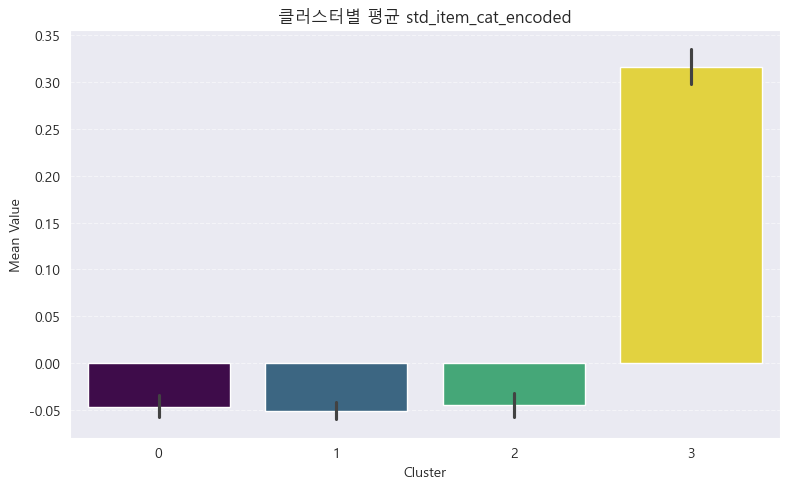

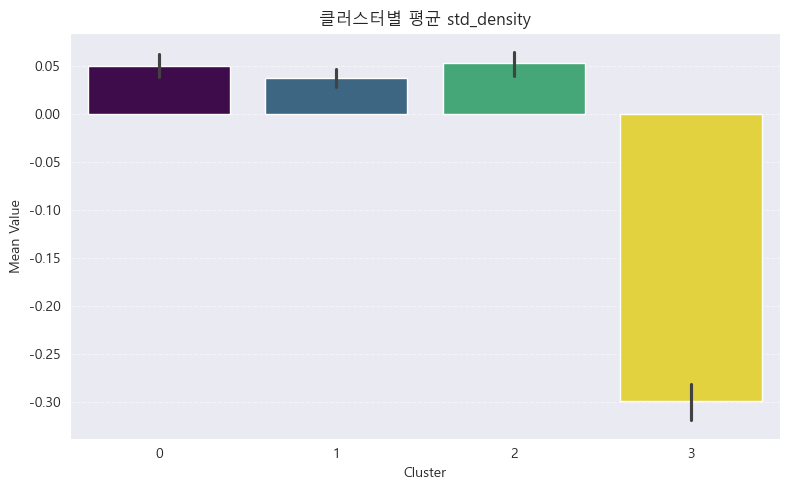

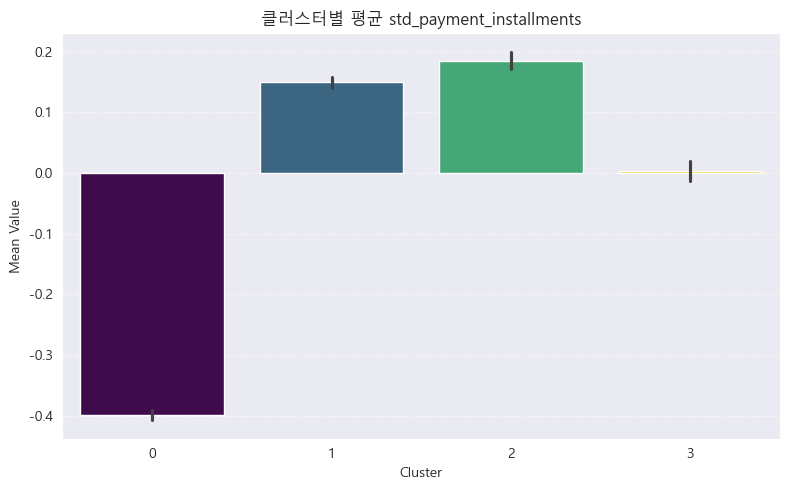

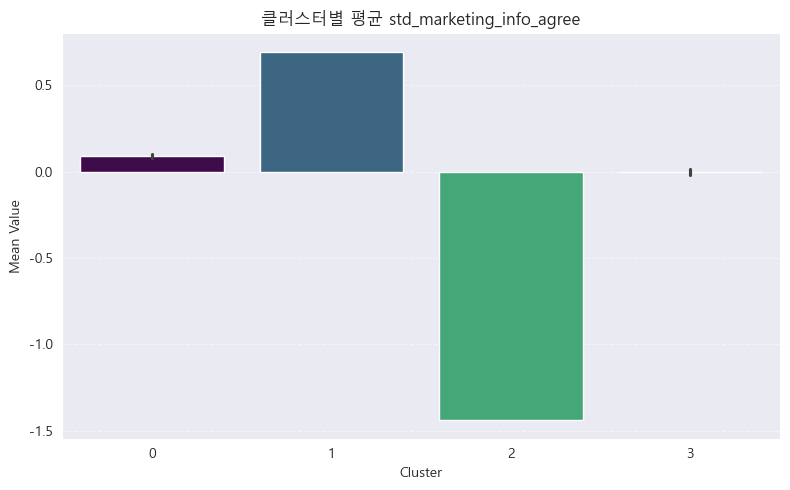

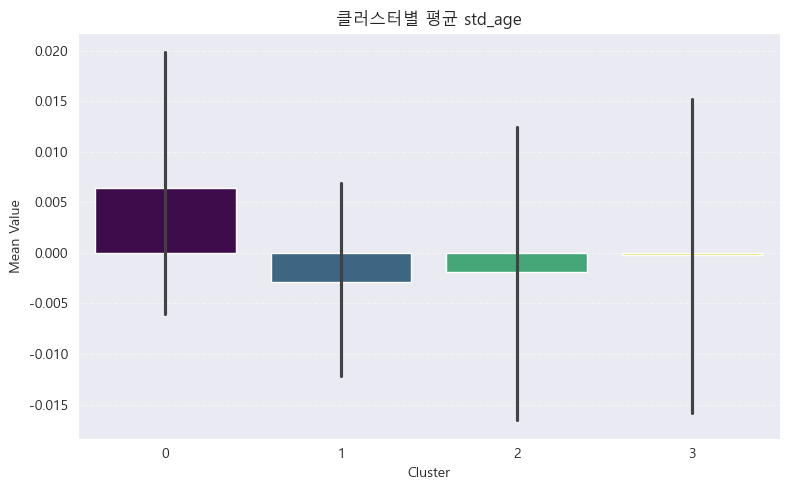

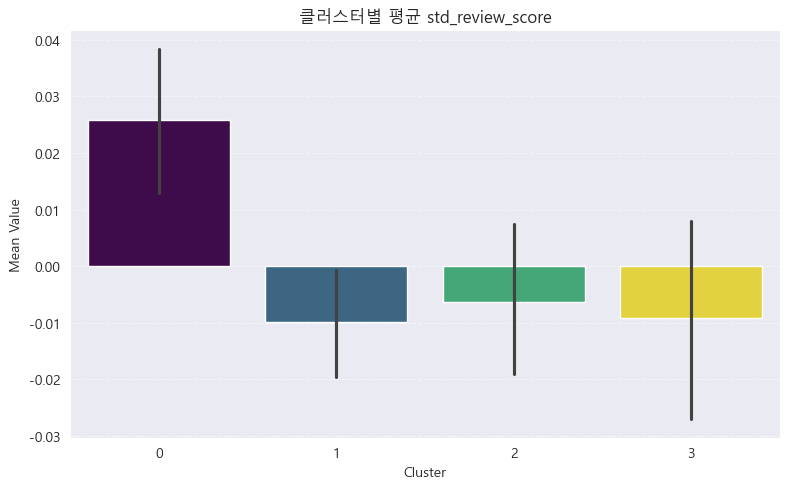

In [ ]:
# 클러스터별 평균값 바 차트 시각화
# 클러스터 컬럼이 있는 경우, 그 외 수치형 컬럼만 선택
numeric_cols = df_mixed.select_dtypes(include='number').drop(columns='Cluster', errors='ignore').columns

for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df_mixed, x='Cluster', y=col, hue='Cluster', palette='viridis', legend=False)
    plt.title(f'클러스터별 평균 {col}')
    plt.xlabel('Cluster')
    plt.ylabel('Mean Value')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

In [ ]:
# 군집별 평균 값보기
cluster_profile = df_mixed.groupby('Cluster').mean().round(2)
print(cluster_profile)

         std_total_price  std_approval_delay_minutes  std_delivery_delay_days  std_delay_rate  std_is_big_product  std_item_cat_encoded  std_density  std_payment_installments  std_marketing_info_agree  std_age  std_review_score
Cluster                                                                                                                                                                                                                            
0                  -0.18                        1.42                     0.12            0.21               -0.39                 -0.05         0.05                     -0.40                      0.09     0.01              0.03
1                  -0.19                       -0.62                    -0.04           -0.09               -0.39                 -0.05         0.04                      0.15                      0.69    -0.00             -0.01
2                  -0.18                       -0.50                    -0.05           

Cluster 0
- approval_delay_minutes 매우 높음 (+1.42)
- installments 낮음 (즉, 거의 일시불 구매)
- 다른 항목은 평균에 가까움

"결제 지연 경험자 그룹"

- 시스템 문제를 겪었지만 리뷰 점수는 나쁘지 않음 (관대하거나 영향 미미)
- UX 개선 우선순위 높음

 Cluster 1
- marketing_info_agree 높음 (+0.69)
- installments 있음
- approval_delay, delivery_delay 둘 다 낮음

"마케팅 수용도 높은 저가+할부 고객"

- 프로모션 타겟 적합
- 민감하고 반응 빠른 중간 매출군 핵심 대상

Cluster 2
- marketing_info_agree 매우 낮음 (-1.44)
- installments 있음
- 나머지 변수 대부분 평균 이하

"비관여 저관여 저가 구매층"
- 반응도 낮고, 충성도 낮을 가능성
- 전략적 방치 대상 혹은 비용 최소화 대상

Cluster 3
- total_price 높음 (+1.22)
- is_big_product 압도적으로 높음 (+2.56)
- density 낮음 (→ 부피 크고 가벼움)
- 대부분 변수 평균

"고가 대형 상품 고객층"

- 리스크 큼 → 이탈 시 타격 큼
- 우선 관리 / VIP 전략군으로 고려

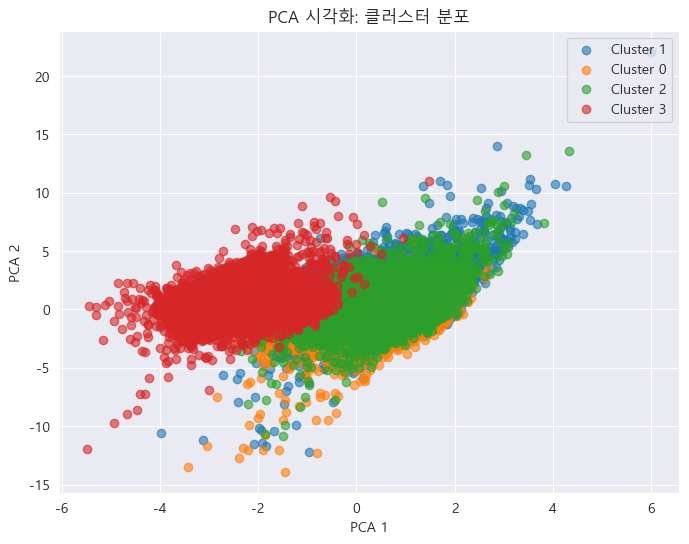

In [ ]:
# 2D 시각화를 위한 차원 축소
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_mixed.drop('Cluster', axis=1))

df_mixed.loc[:, 'pca1'] = pca_result[:, 0]
df_mixed.loc[:, 'pca2'] = pca_result[:, 1]

# 산점도 시각화
plt.figure(figsize=(8, 6))
for cluster_id in df_mixed['Cluster'].unique():
    subset = df_mixed[df_mixed['Cluster'] == cluster_id]
    plt.scatter(subset['pca1'], subset['pca2'], label=f'Cluster {cluster_id}', alpha=0.6)
plt.legend()
plt.title('PCA 시각화: 클러스터 분포')
plt.legend(loc='upper right')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

In [ ]:
# 혹시라도 PCA 전에 cluster 컬럼이 있었는지
print(df_mixed.columns)

# 혹시 log나 std 하기 전 원본 컬럼이 섞여 있었는지
# 예: total_price, density, shipping_charges 등

# PCA 2 방향의 원인 추정
# PCA 수행에 사용한 실제 컬럼 (예: 클러스터, pca1, pca2, 등 제외)
pca_input_cols = [
    'std_total_price',
    'std_approval_delay_minutes',
    'std_delivery_delay_days',
    'std_delay_rate',
    'std_is_big_product',
    'std_item_cat_encoded',
    'std_density',
    'std_payment_installments',
    'std_marketing_info_agree',
    'std_age',
    'std_review_score'
]

# PCA components 해석
loadings = pd.DataFrame(pca.components_.T,
                        columns=['PCA1', 'PCA2'],
                        index=pca_input_cols)

print(loadings.sort_values('PCA2', ascending=False).head())

Index(['std_total_price', 'std_approval_delay_minutes', 'std_delivery_delay_days', 'std_delay_rate', 'std_is_big_product', 'std_item_cat_encoded', 'std_density', 'std_payment_installments', 'std_marketing_info_agree', 'std_age', 'std_review_score', 'Cluster', 'pca1', 'pca2'], dtype='object')
                              PCA1          PCA2
std_payment_installments -0.091239  1.670966e-01
std_is_big_product       -0.647073  1.397854e-01
std_total_price          -0.633268  1.088089e-01
std_item_cat_encoded     -0.306769  7.506968e-02
std_marketing_info_agree -0.000905 -6.075291e-07


PCA1, PCA2 영향도

PCA1
- std_is_big_product
- std_total_price
- std_item_cat_encoded

PCA2
- std_payment_installments

In [ ]:
print(pca.explained_variance_ratio_)

[0.14069237 0.13652043]


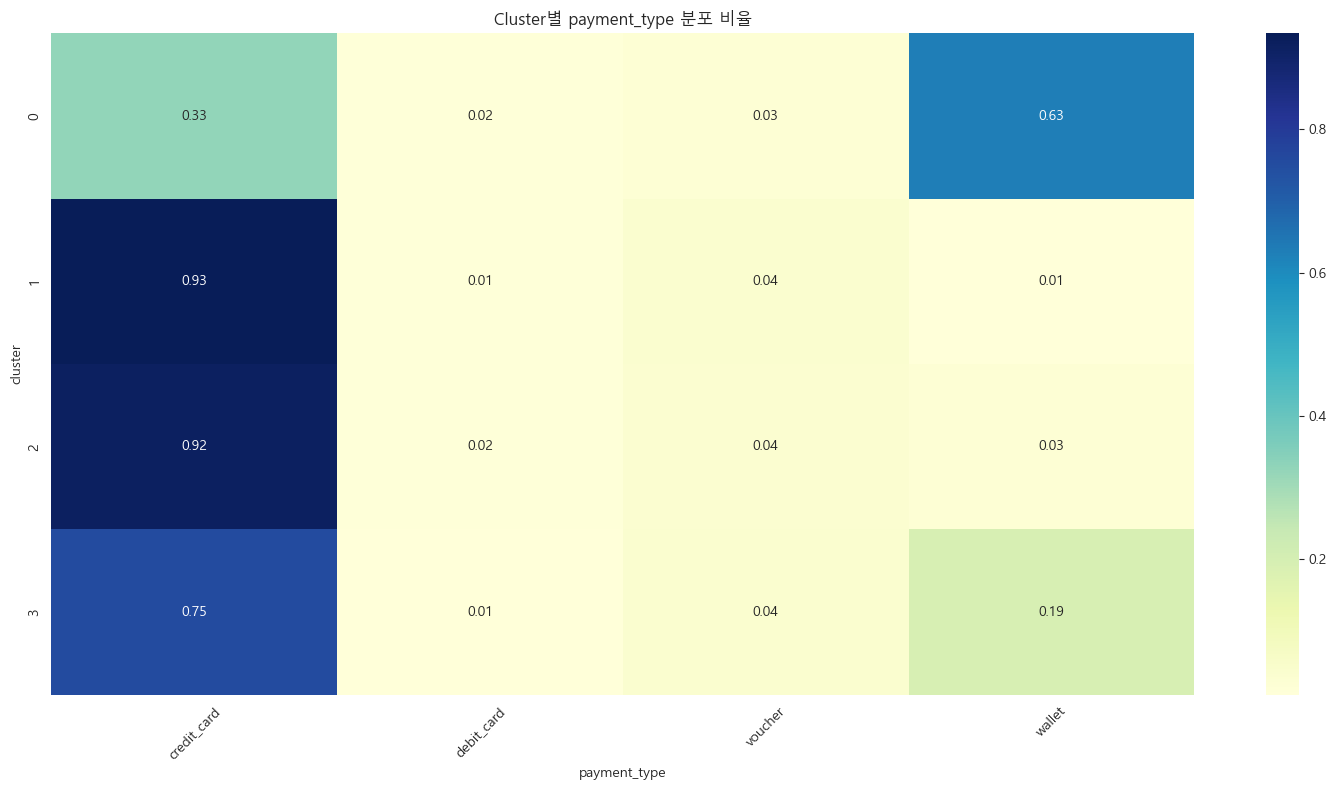

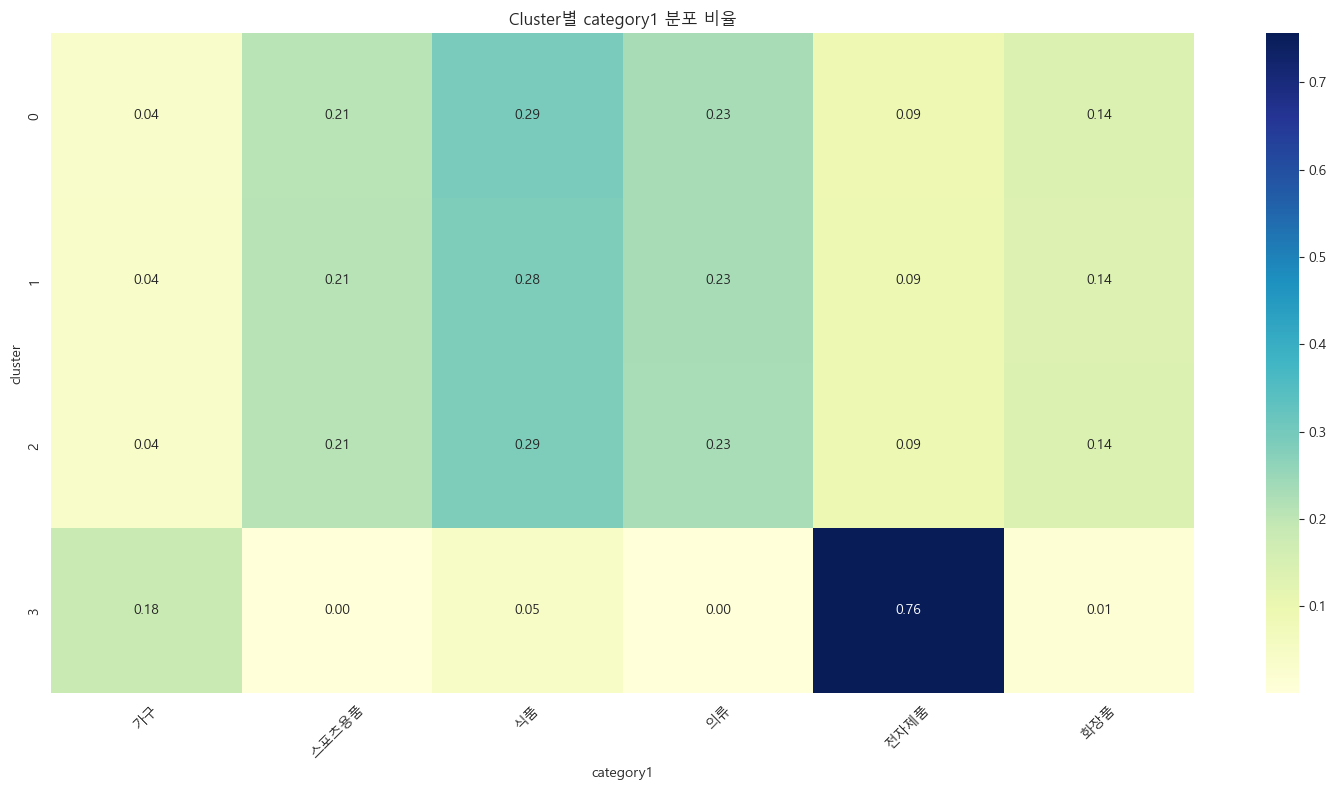

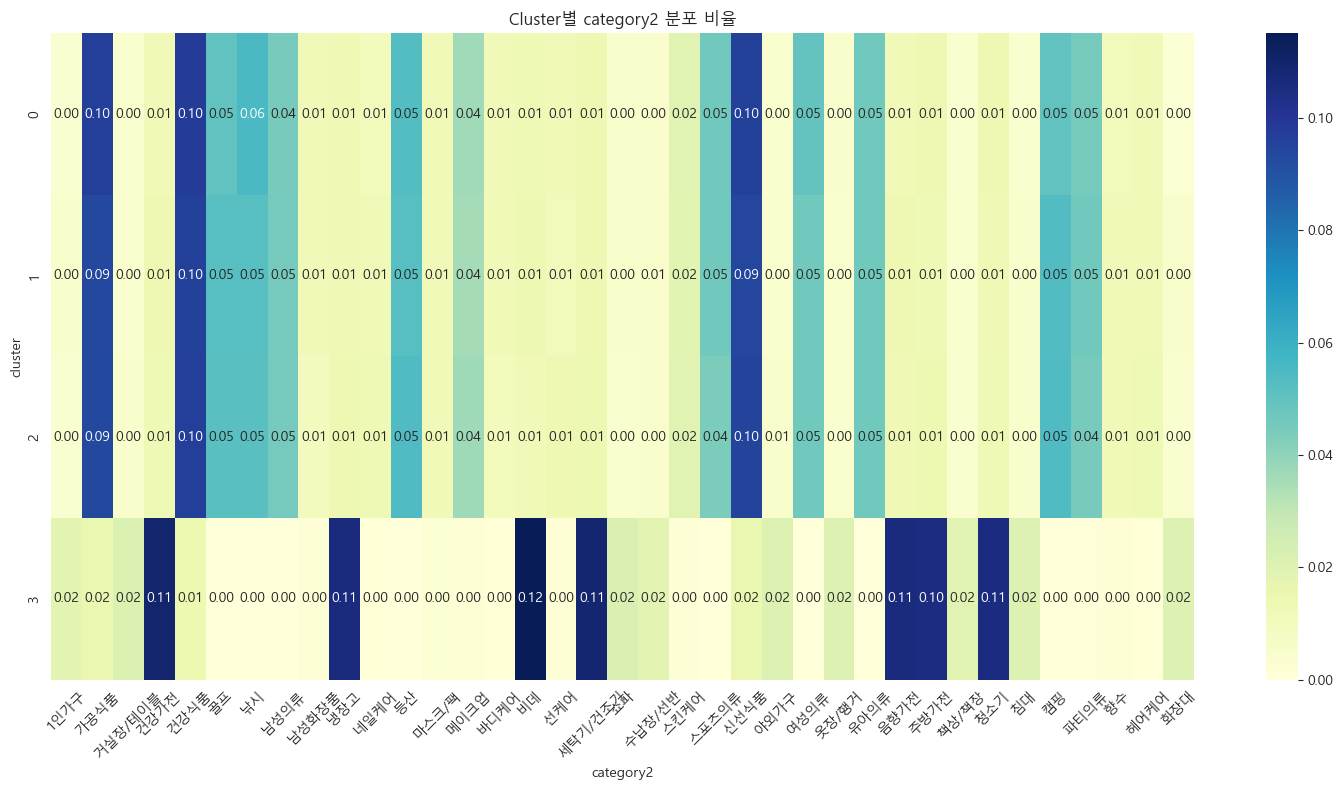

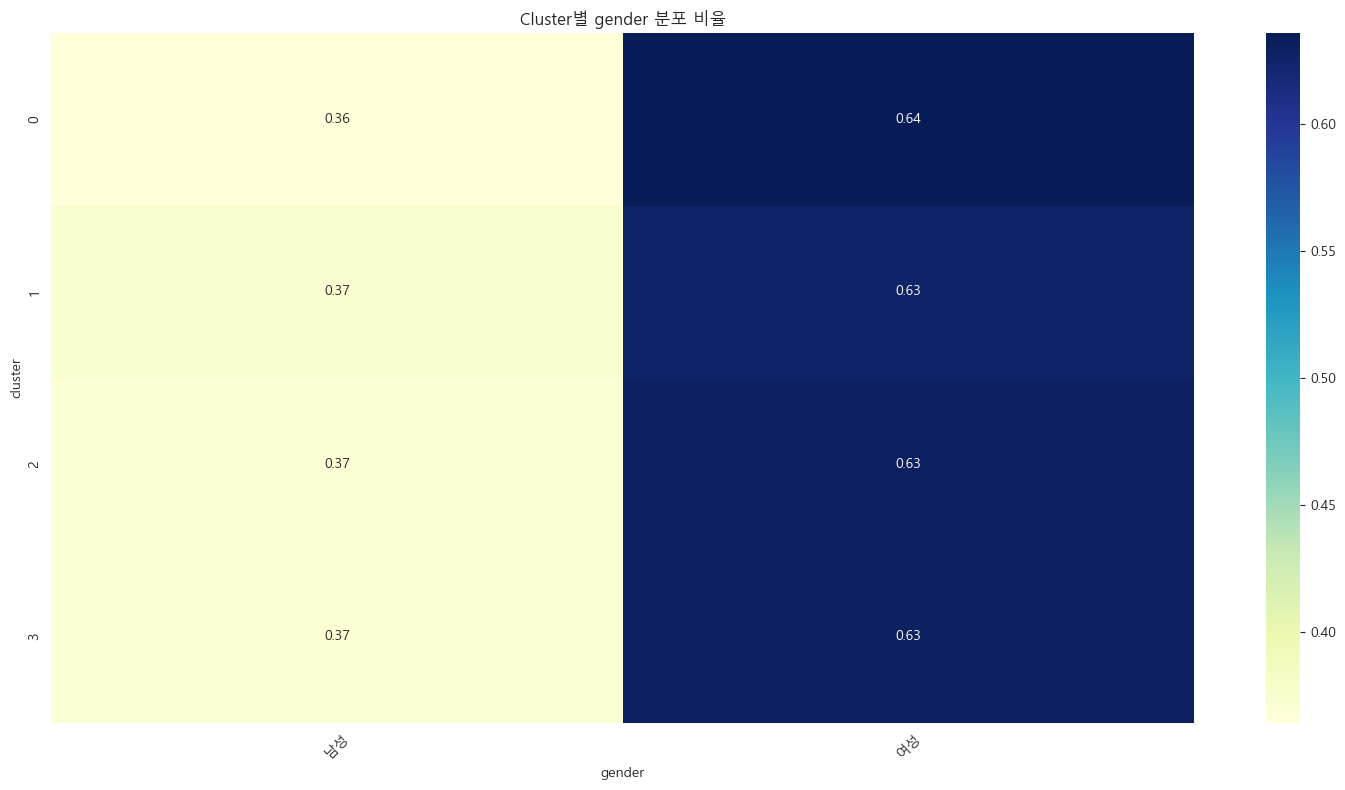

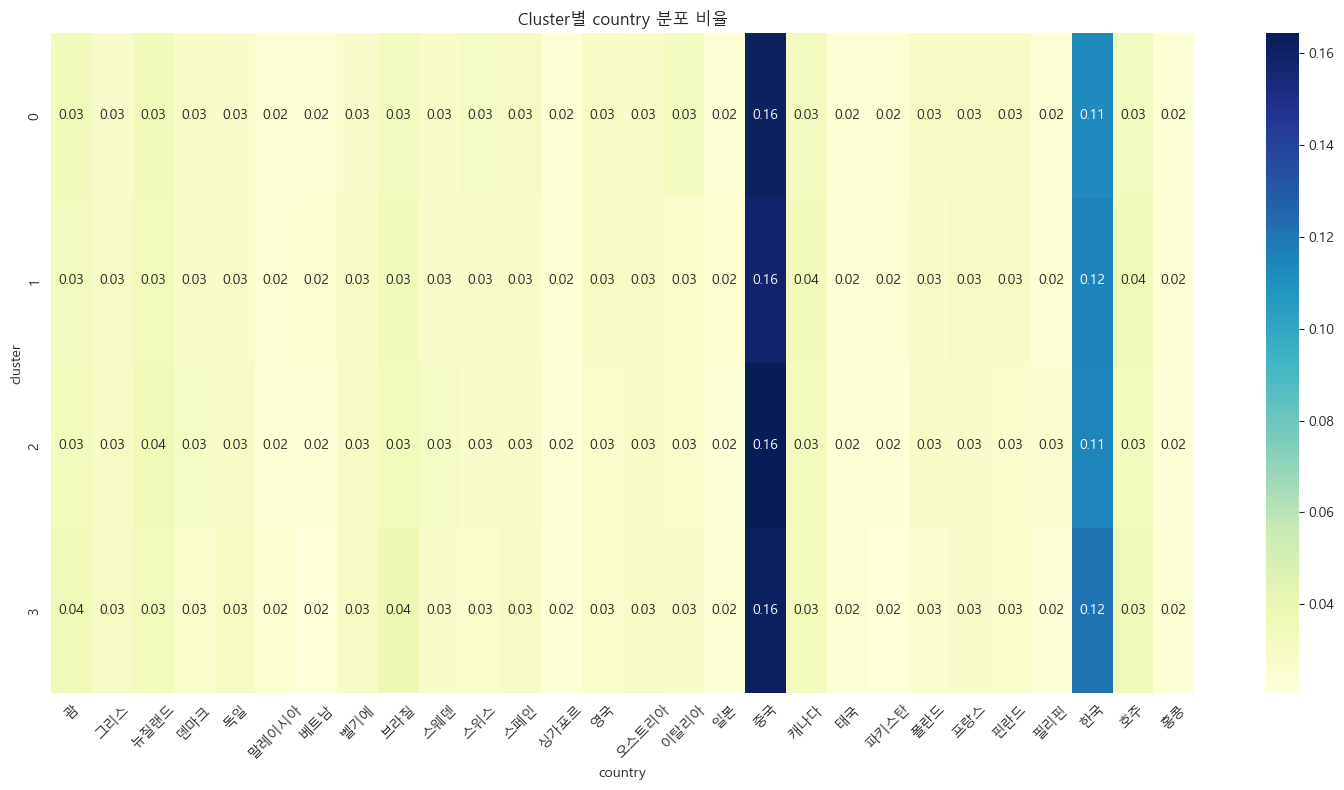

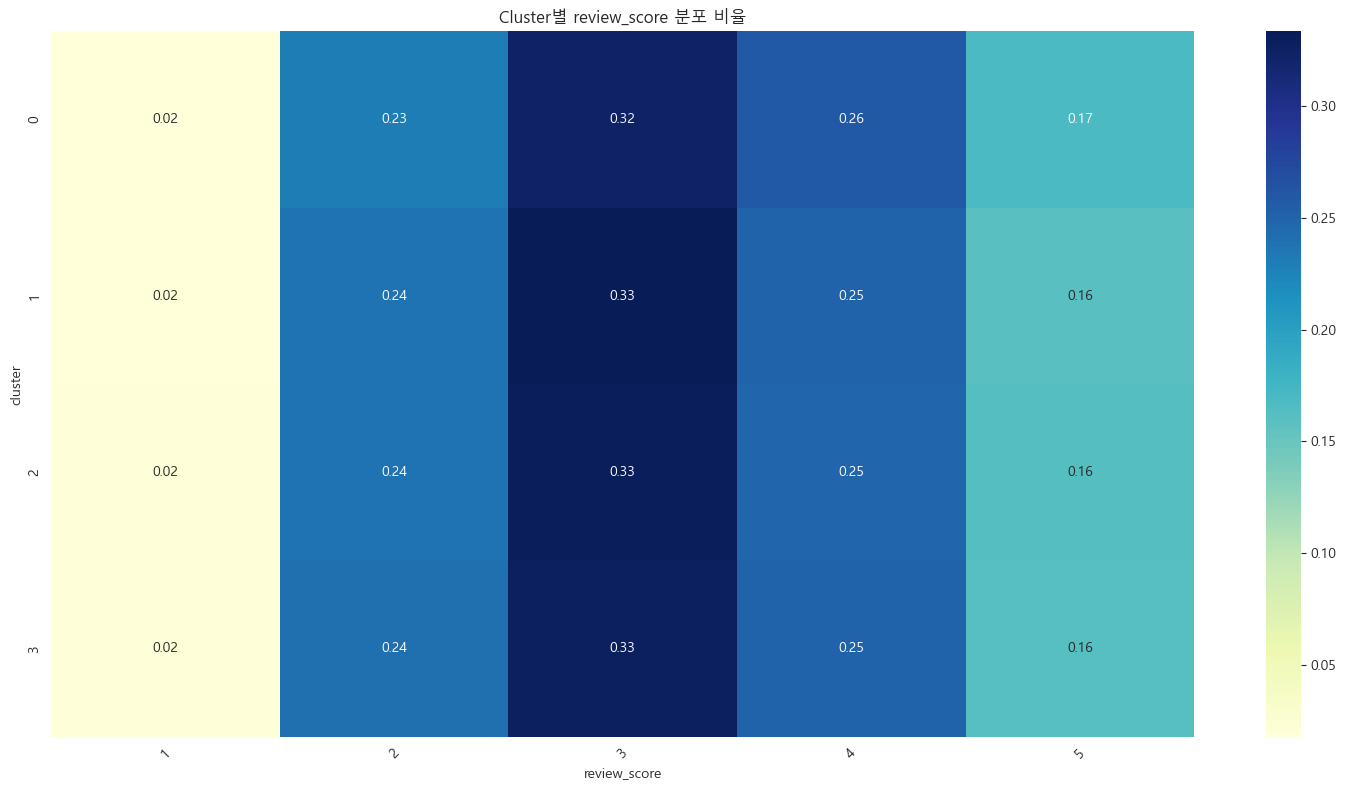

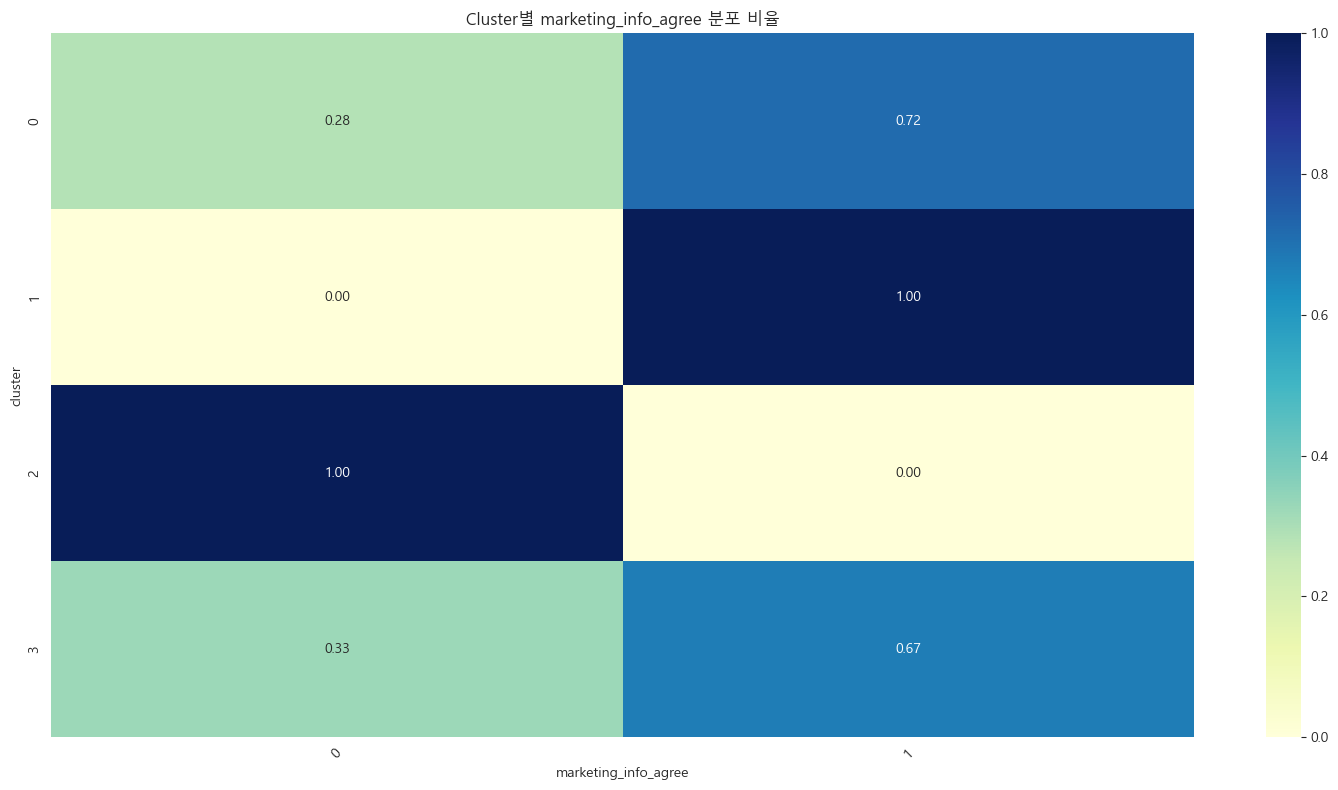

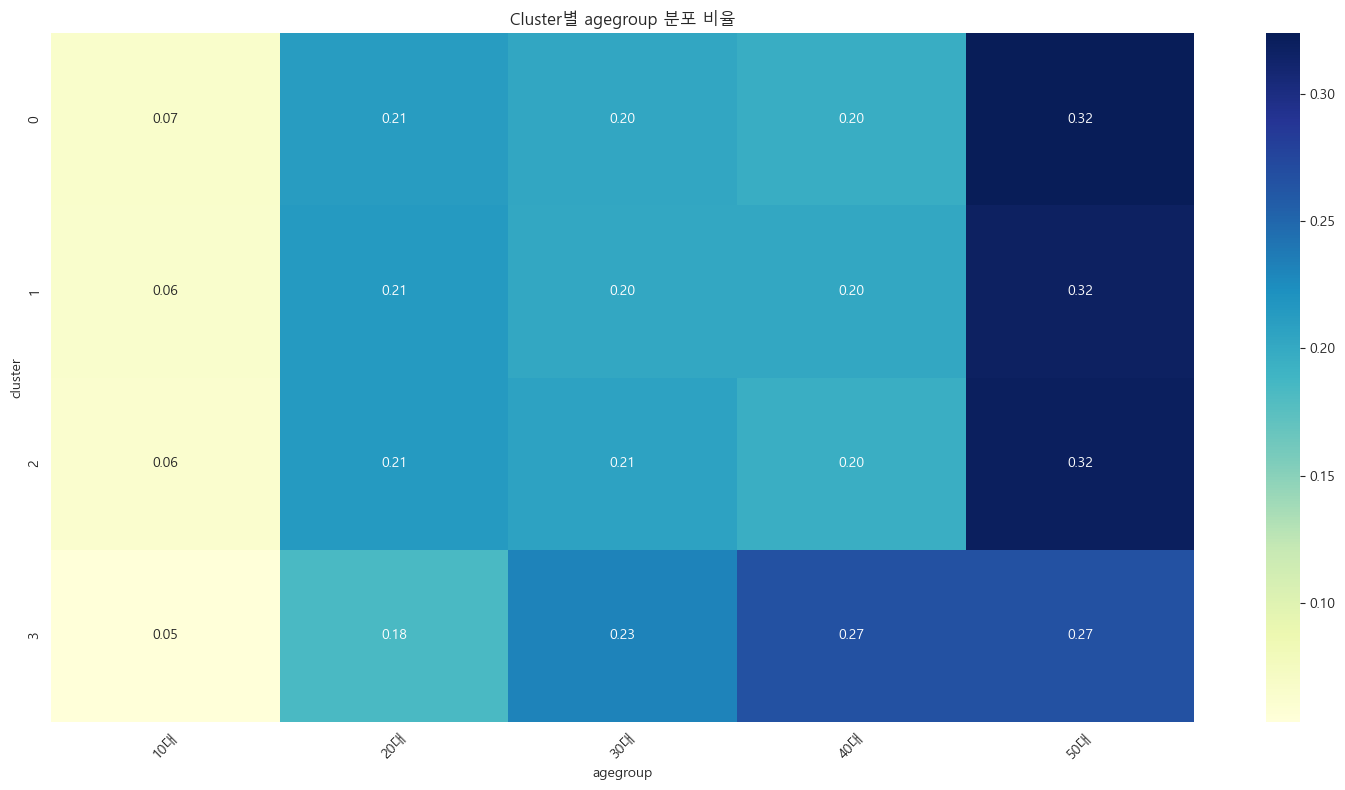

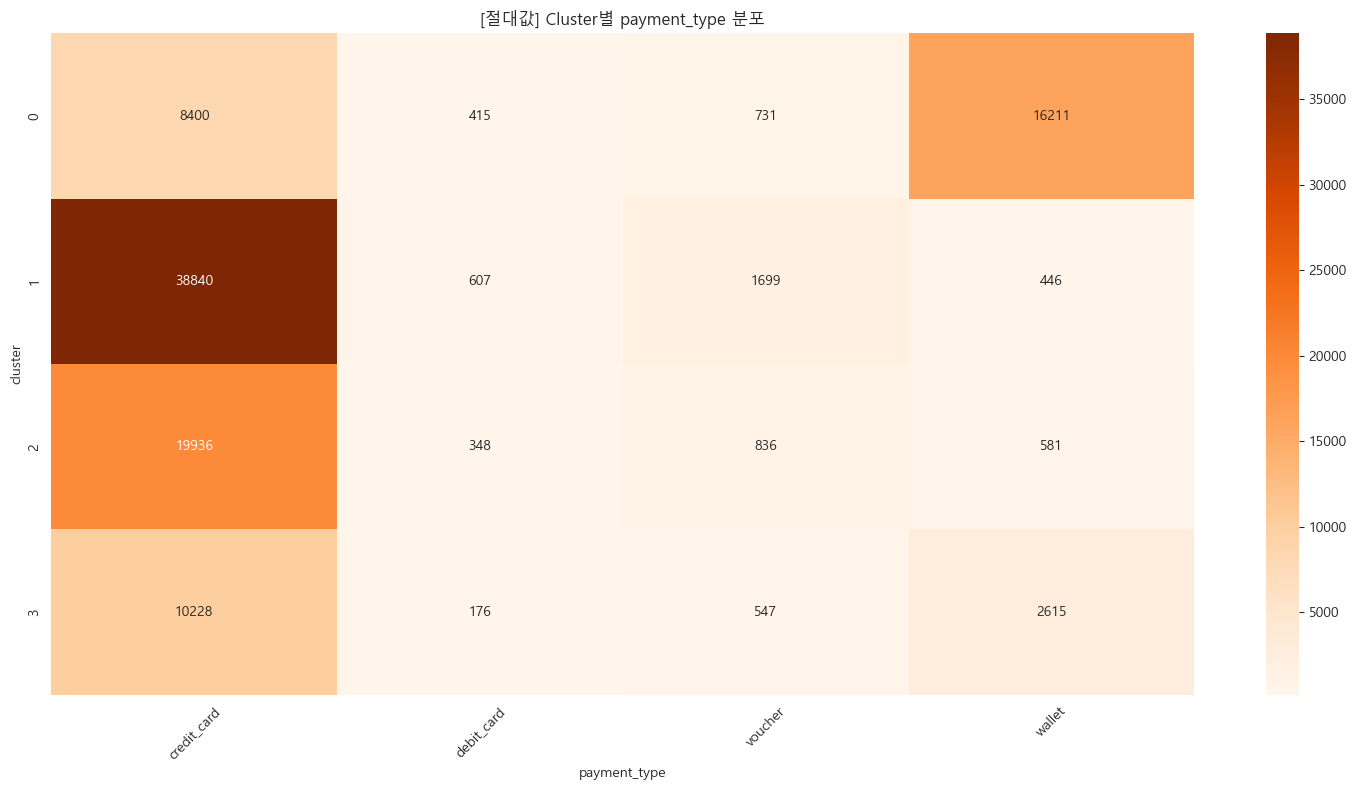

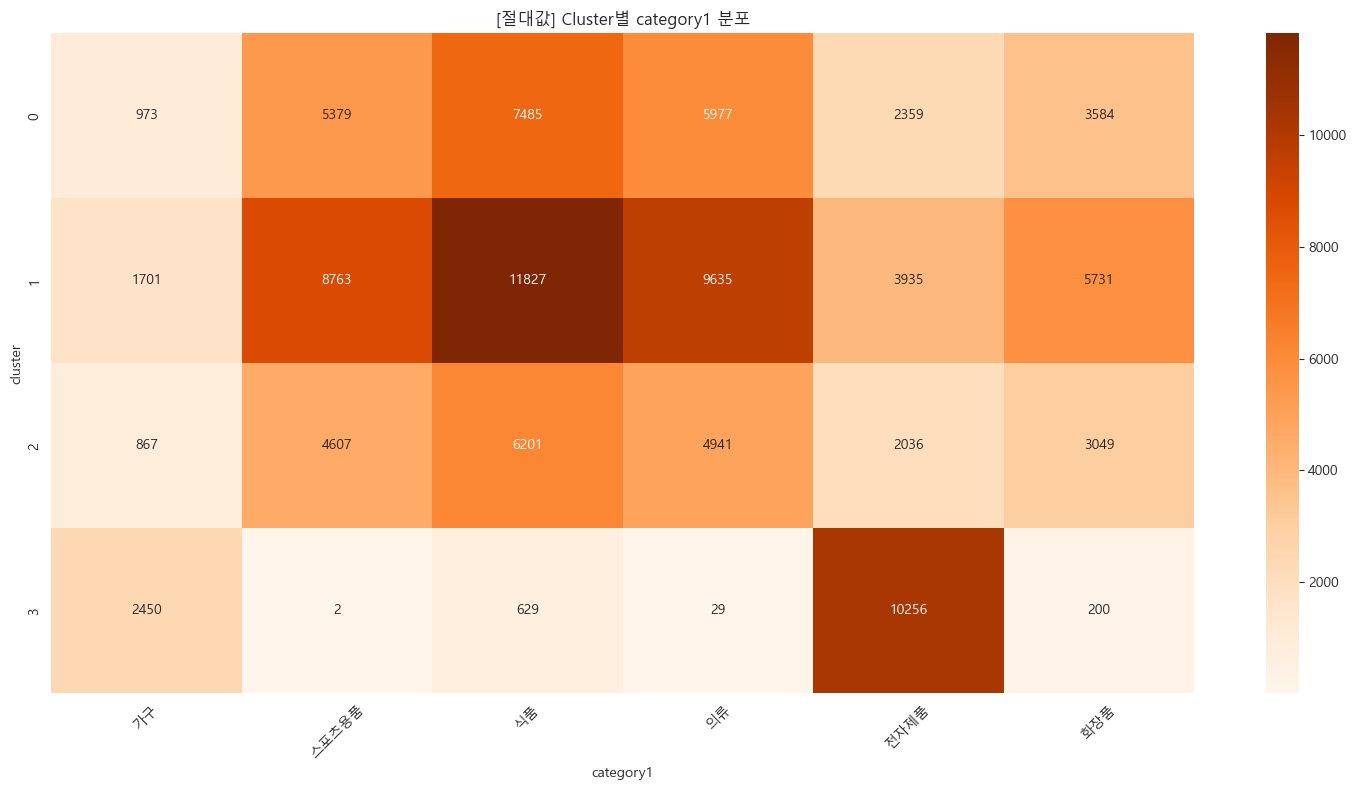

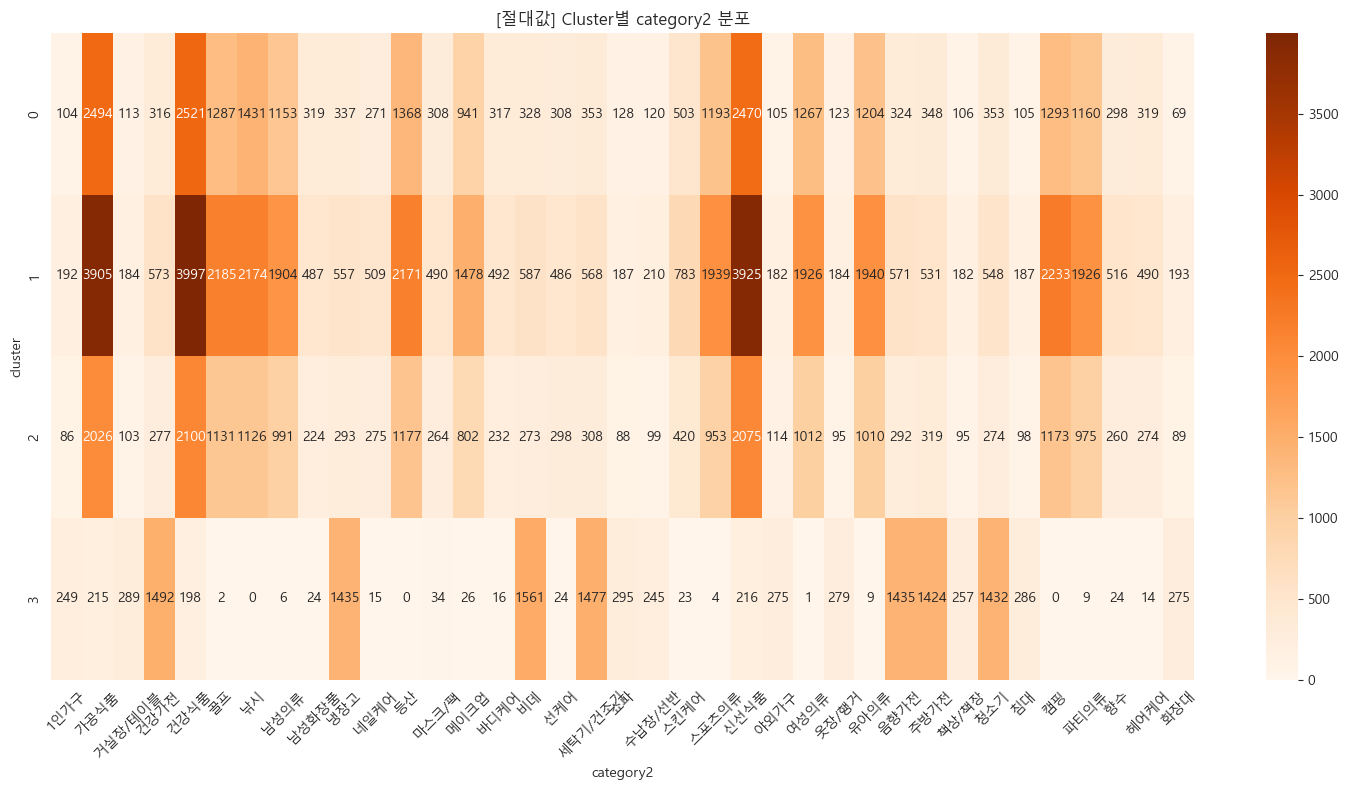

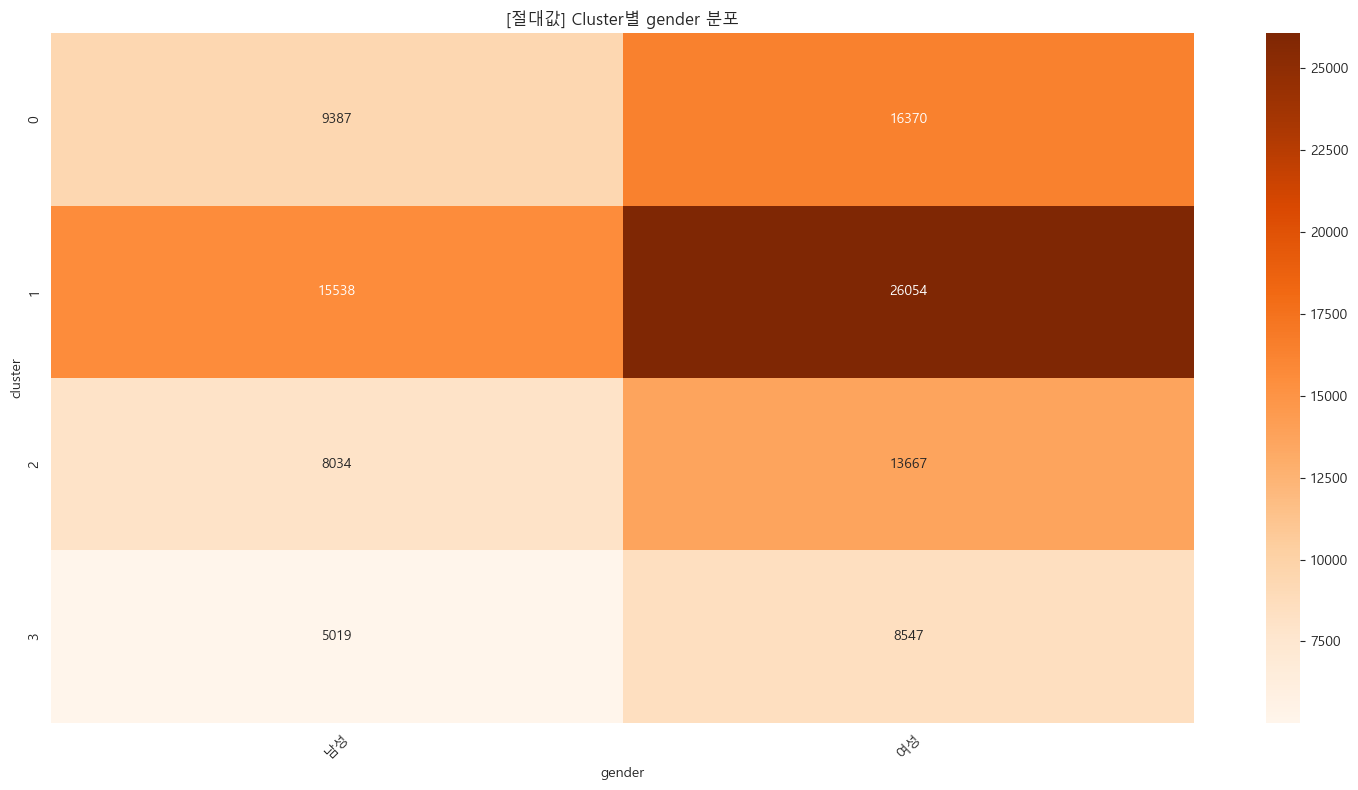

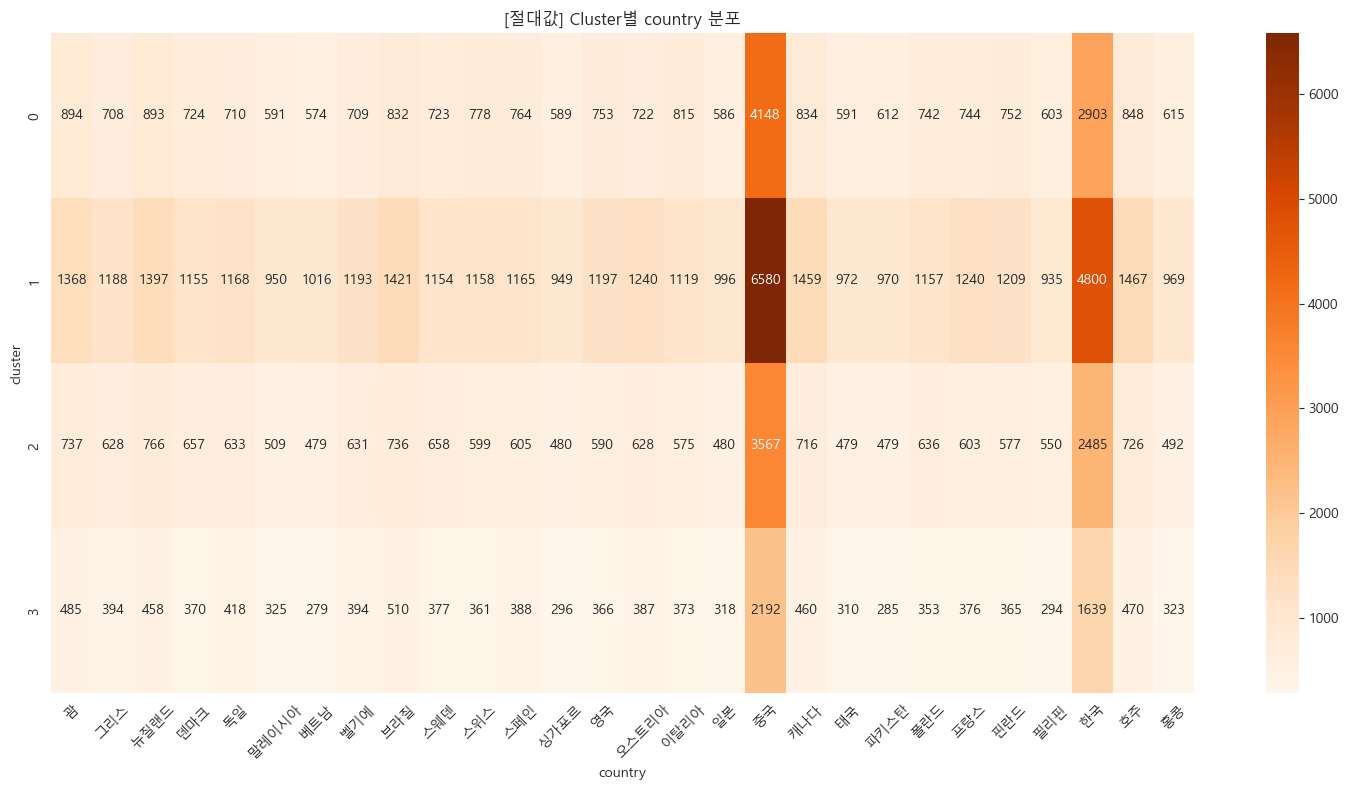

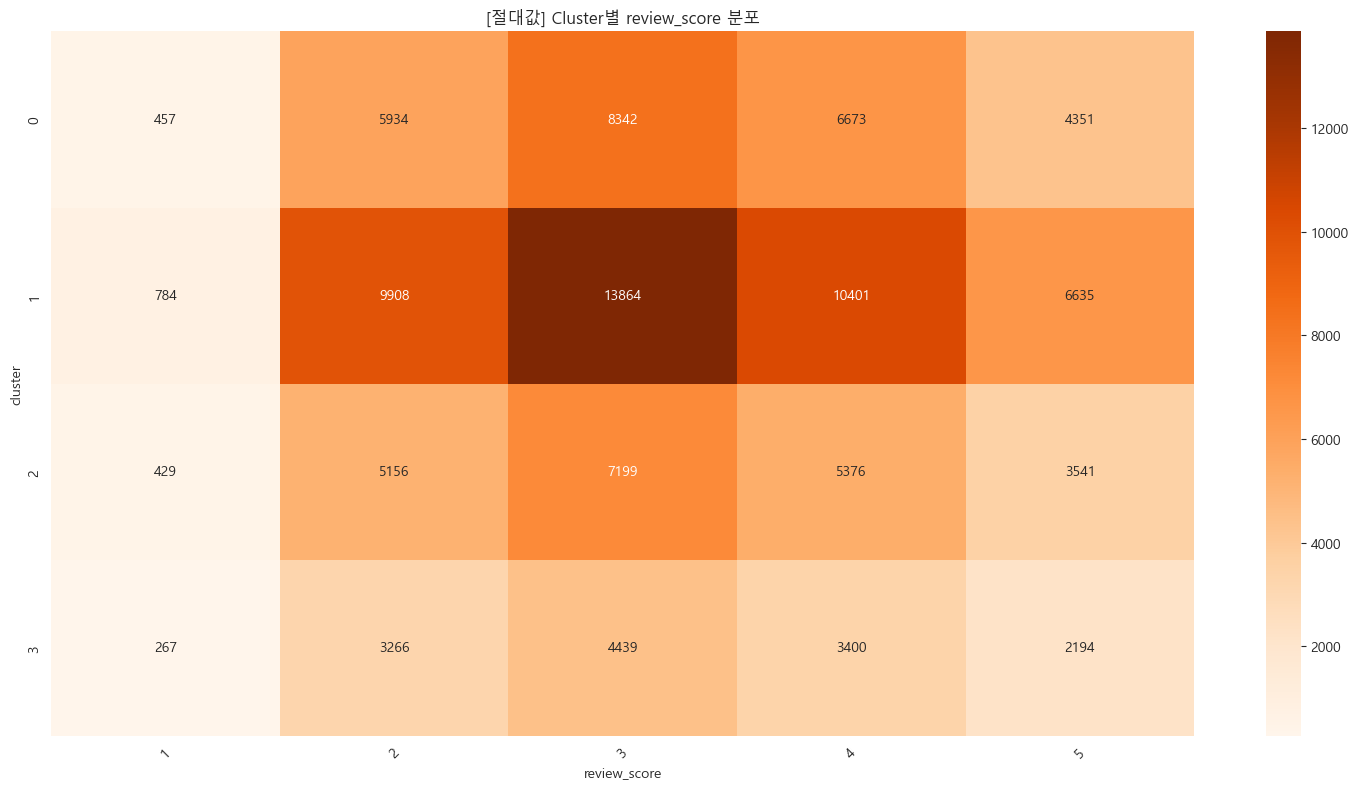

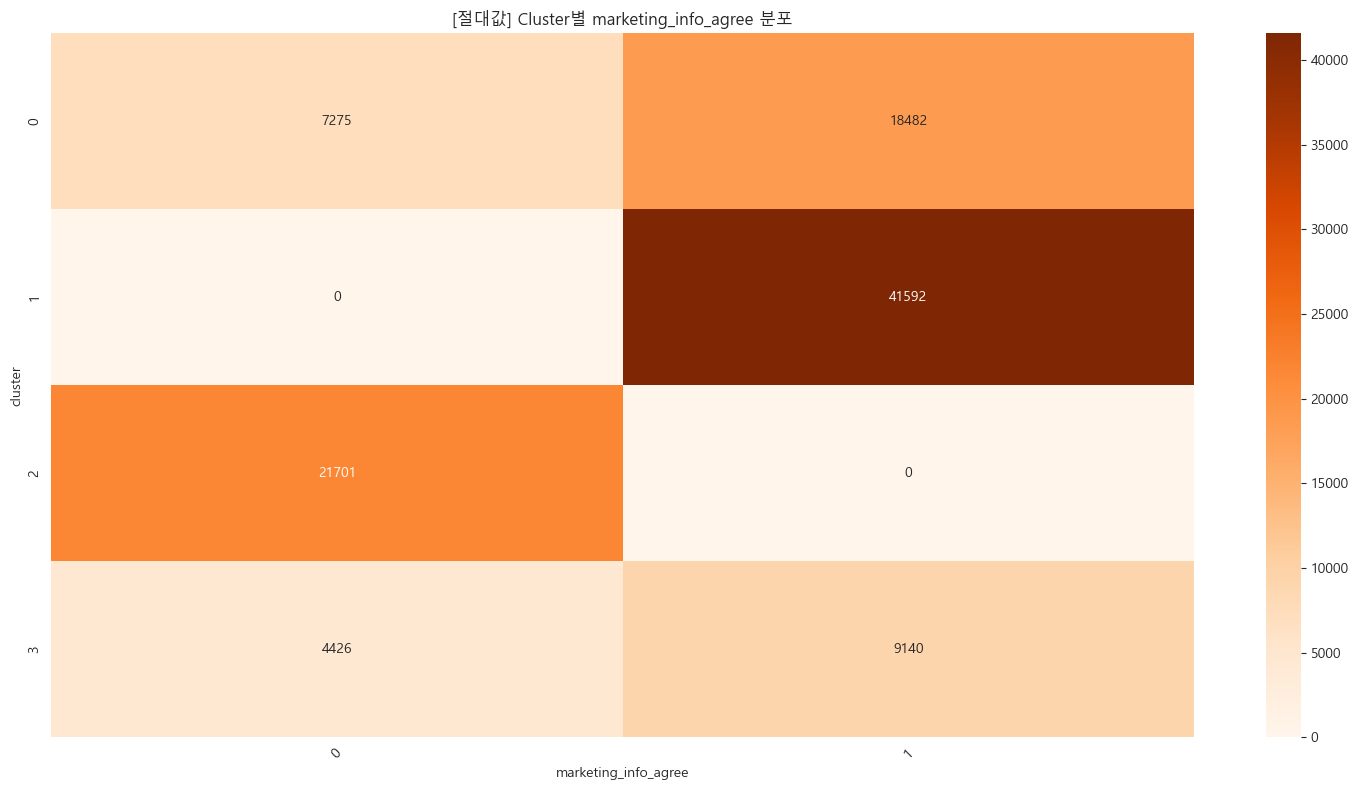

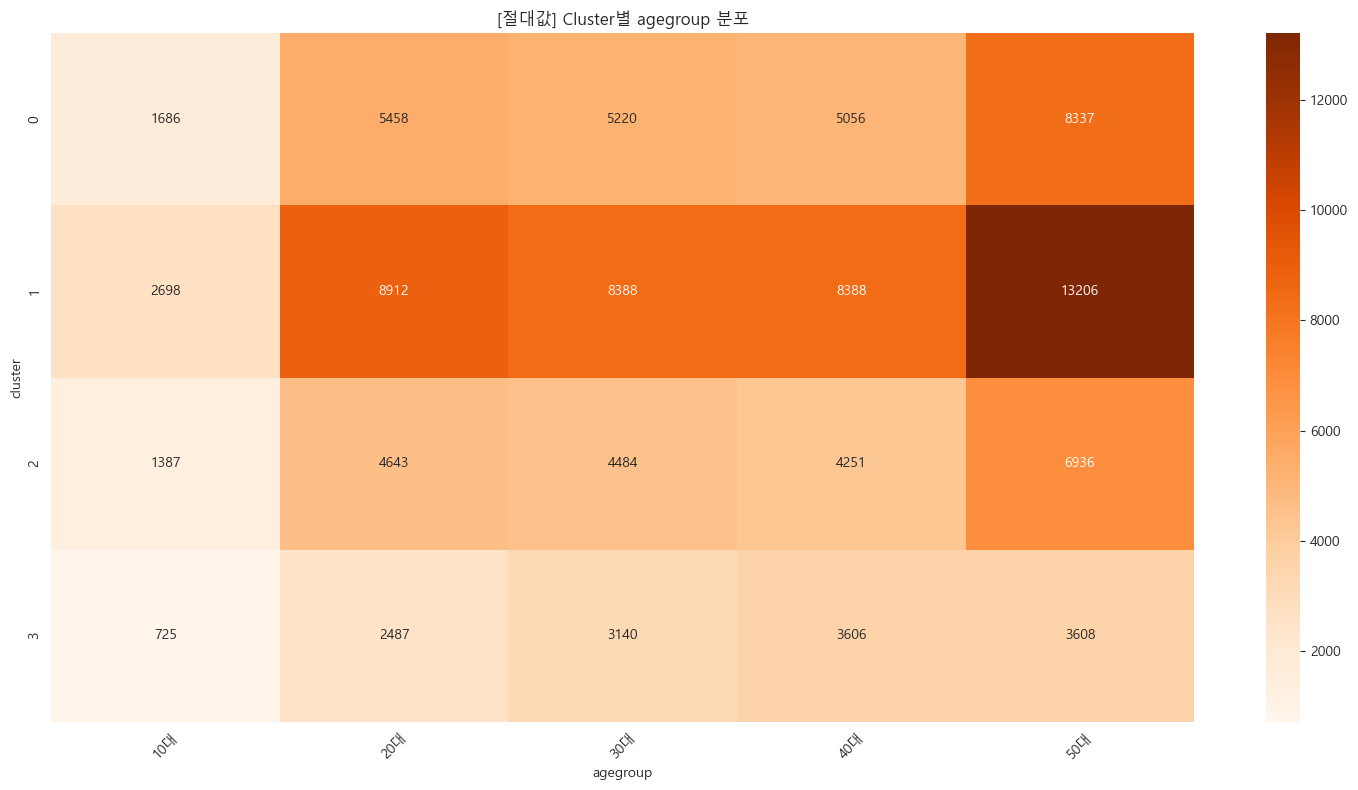

In [ ]:
# 클러스터 라벨 붙여진 df_mixed 기준으로 병합
df_merged = marketing_delivered.copy()
df_merged['cluster'] = df_mixed['Cluster'].values

cols = [
    'payment_type', 'category1', 'category2',
    'gender', 'country', 'review_score',
    'marketing_info_agree', 'agegroup'
]

for col in cols:
    ct = pd.crosstab(df_merged['cluster'], df_merged[col], normalize='index')
    plt.figure(figsize=(15, 8))
    sns.heatmap(ct, annot=True, fmt=".2f", cmap='YlGnBu')
    plt.title(f'Cluster별 {col} 분포 비율')
    plt.ylabel('cluster')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

for col in cols:
    ct = pd.crosstab(df_merged['cluster'], df_merged[col])
    plt.figure(figsize=(15, 8))
    sns.heatmap(ct, annot=True, fmt="d", cmap='Oranges')
    plt.title(f'[절대값] Cluster별 {col} 분포')
    plt.ylabel('cluster')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Cluster 0 — 지갑 결제층 & 마케팅 반응 고객군
- 결제 수단	wallet 사용자 많음 (16,211) → 간편 결제 선호
- 마케팅 동의율	71% (마케팅 반응 고객 다수)
- 카테고리	쇼핑, 의류 중심 (합산 1.2만건)
- 리뷰 점수	전반적으로 높음 (4~5점 다수)

해석
- 마케팅에 반응하는 중장년층 여성 고객
- 지갑 결제 편의성, 브랜드 프로모션 강화,
- 장기 보유/우수고객 리텐션 전략 적합

Cluster 1 — 마케팅 수용 + 신용카드 주 사용 쇼핑층
- 결제 수단	credit_card 93% (38,840) → 신용 결제 중심
- 마케팅 동의율	100% 전원 동의 (41,592)
- 카테고리	쇼핑/의류 다수 (합산 2만+)
- 리뷰 점수	높은 점수 비중 (3~5점)

해석
- 충성도 높은 주력 고객군, 마케팅 타겟에 최적화
- 쿠폰/적립/혜택 캠페인 집중 운영,
- LTV 매우 높을 가능성, 고가 상품군 확장 추천

Cluster 2 — 마케팅 거부 · 비선호층

- 마케팅 동의율	100% 거부 (21,701명)
- 결제 수단	credit_card + wallet 혼용
- 연령/성별	전반적으로 분산 → 저관여층
- 리뷰 점수	3~4점대가 주축
- 카테고리	쇼핑/의류 다수, 전자제품도 일부

해석
- 관여도 낮고 마케팅 무관심한 층
- 광고 효율 낮음, 자동화 / 일반 타겟팅 제외
- 단순 리마케팅 정도만 유지 추천

Cluster 3 — 전자기기 전문 소비층

- 카테고리	전자제품 76% 압도적 비중 (10,256)
- 결제 수단	wallet 상대적 다수 (2,615)
- 마케팅 동의율	67% 정도 수용
- 연령/성별	전 연령 분포
- 리뷰 점수	전반적으로 높음

해석
- 고관여 전자제품 소비자, 제품 가치에 민감
- 프리미엄 서비스 / A/S 지원 / 후기 기반 마케팅
- CS 우선 순위 고객, 상품 리뷰 전략 주도 가능

In [ ]:
# LTV란?
# LTV (Customer Lifetime Value, 고객 생애 가치) : 한 고객이 우리와 거래하면서 예상되는 총 수익

ltv_df = df_merged.groupby('cluster').agg(
    total_ltv=('total_price', 'sum'),  # 총 구매 금액
    avg_ltv=('total_price', 'mean'),   # 구매 1건당 평균 금액
    purchase_count=('order_id', 'count'),  # 총 구매건수
    unique_customers=('customer_id', 'nunique')  # 고객 수
).reset_index()

# 고객당 평균 LTV 및 재구매율
ltv_df['ltv_per_customer'] = ltv_df['total_ltv'] / ltv_df['unique_customers']
ltv_df['repurchase_rate'] = ltv_df['purchase_count'] / ltv_df['unique_customers']

ltv_df


,cluster,total_ltv,avg_ltv,purchase_count,unique_customers,ltv_per_customer,repurchase_rate
0,0,2100173.62,81.537975,25757,24120,87.071875,1.067869
1,1,3372371.80,81.082223,41592,38075,88.571814,1.092370
2,2,1765913.21,81.374739,21701,19914,88.676971,1.089736
3,3,1743981.27,128.555305,13566,13160,132.521373,1.030851


Cluster 0

LTV 87.07 재구매율 1.07
(가격대 낮지만 재방문률 높음 → 충성도 높음)

Cluster 1

LTV 88.57 재구매율 1.09
(전략 타겟으로 우선 운영해야 할 핵심 고객군)

Cluster 2

LTV 88.68 재구매율 1.09
(마케팅 무반응이지만 실질 구매력은 높음 → 광고 ROI 주의)

Cluster 3

LTV 132.52 재구매율 1.03
(단가 높고 재구매 낮음, CS 집중·신뢰 전략 필요)

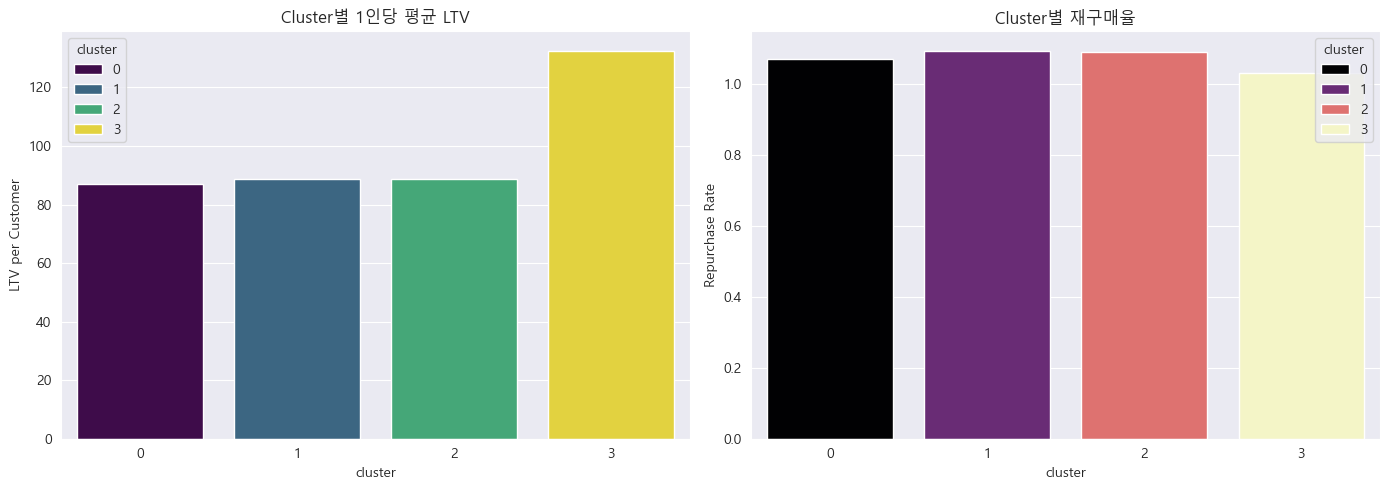

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# LTV per customer 시각화
sns.barplot(data=ltv_df, x='cluster', y='ltv_per_customer', hue='cluster', ax=axes[0], palette='viridis')
axes[0].set_title('Cluster별 1인당 평균 LTV')
axes[0].set_ylabel('LTV per Customer')
axes[0].set_xlabel('cluster')

# 재구매율 시각화
sns.barplot(data=ltv_df, x='cluster', y='repurchase_rate', hue='cluster', ax=axes[1], palette='magma')
axes[1].set_title('Cluster별 재구매율')
axes[1].set_ylabel('Repurchase Rate')
axes[1].set_xlabel('cluster')

plt.tight_layout()
plt.show()

Cluster 0: 실속파 중장년 고객

LTV: 보통 (87.07)

재구매율: 높음 (1.07)

주요 특징:
- 지갑 결제 사용률 높음
- 마케팅 정보 동의율 낮음

제품군: 소형 실용 제품 위주 (ex. 수납가구, 생필품)

전략 제안:
- 실용성과 신뢰 기반 리텐션 전략
    - 중장년 타겟 프로모션, 사용 후기 유도

Cluster 1: 마케팅 친화적 핵심 타겟

LTV: 안정적 (88.57)

재구매율: 최고 (1.09)

주요 특징:

- 신용카드 결제 압도적

- 전원 마케팅 동의

제품군: 구매 카테고리 다양, 특히 가구/가전 인기

전략 제안:
- 마케팅 수용도 높고 구매력도 높은 핵심 고객
    - 맞춤 프로모션, 리타게팅, 구독 상품 추천



Cluster 2: 조용한 고정 수익 저관여층

LTV: 안정적 (88.68)

재구매율: 높음 (1.089)

주요 특징:

- 마케팅 정보 모두 미동의

제품군: 가구, 생활용품 중심

전략 제안:
- 광고보단 직접경험/리뷰 기반 구매 유도
    - 리마인드 메일보다는 UX 개선, 간접 신뢰 확보 방식

Cluster 3: 고가 전자제품 단발 고객

LTV: 매우 높음 (132.5)

재구매율: 가장 낮음 (1.03)

주요 특징:

- 고가/대형 상품 구매자
- 전자제품, 화장품 비중 높음

제품 신뢰 기반 구매 경향

전략 제안:
- 재구매보다 고객 만족 & 후기 유도
    - A/S, 프리미엄 혜택, 단발 고객 → 브랜드 팬화 전략